# **Problem Statement**

---

## 🧠 **Business Context**  

Understanding customer **personality** and **behavior** is pivotal for enhancing satisfaction and boosting revenue.  
Segmenting customers based on their **demographics**, **lifestyles**, and **purchase behavior** enables:

- 🎯 Tailored marketing campaigns  
- 🤝 Better customer retention  
- 🛍️ More personalized product offerings

A leading **retail company**, growing rapidly, wants to dive deeper into customer profiles to:

- 🔍 Improve campaign effectiveness  
- 💎 Identify high-value customers  
- 🤗 Foster long-term loyalty  

With rising competition, **generic strategies no longer suffice** — personalization is key to staying ahead.

---

## 🎯 **Objective**

To boost marketing efficiency and enhance customer experience, the company aims to:

1. ✉️ Develop **personalized campaigns** to increase conversions  
2. 🔐 Build **retention strategies** for high-value segments  
3. 📦 Optimize **resource allocation** (inventory, pricing, store layout)


## 📋 **Data Dictionary**

The dataset includes customer demographics, personality traits, and purchasing behavior. Here's a breakdown:

### 👤 1. Customer Information
- **ID**: Unique customer identifier  
- **Year_Birth**: Birth year  
- **Education**: Education level  
- **Marital_Status**: Marital status  
- **Income**: Yearly income ($)  
- **Kidhome**: Number of children  
- **Teenhome**: Number of teenagers  
- **Dt_Customer**: Enrollment date  
- **Recency**: Days since last purchase  
- **Complain**: Complained in last 2 years (1 = Yes, 0 = No)

### 🍽️ 2. Spending (Last 2 Years)
- **MntWines**: 💬 Wine spending  
- **MntFruits**: 🍎 Fruit spending  
- **MntMeatProducts**: 🍖 Meat spending  
- **MntFishProducts**: 🐟 Fish spending  
- **MntSweetProducts**: 🍬 Sweets spending  
- **MntGoldProds**: 💍 Gold products spending

### 📢 3. Campaign Interaction
- **NumDealsPurchases**: Purchases using discounts  
- **AcceptedCmp1–5**: Response to campaigns 1–5 (1 = Yes, 0 = No)  
- **Response**: Response to the last campaign

### 🛒 4. Shopping Behavior
- **NumWebPurchases**: 🖥️ Web purchases  
- **NumCatalogPurchases**: 📘 Catalog purchases  
- **NumStorePurchases**: 🏪 In-store purchases  
- **NumWebVisitsMonth**: 🌐 Website visits (last month)


# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder
# I added this one for Label Code object

# to suppress warnings
import warnings
import time

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

## **Data Overview**

 What are the data types of all the columns?

In [ ]:
data.shape # Let's check the shape of our data

(2240, 29)

In [ ]:
# Write your code here.
dt = pd.DataFrame(data = data.dtypes, columns = ['info'])
type_columns = {}

# We loop for knowing the type of our data
for types in dt['info']:
  if types  not in type_columns:
    type_columns[types] = 1
  else:
    type_columns[types] += 1


print(type_columns) #

{dtype('int64'): 25, dtype('O'): 3, dtype('float64'): 1}


### 📌 **Observations**
1. 📊 The dataset contains **2,240 customer records** and **29 features** in total.
2. 🔢 Among them, **26 features are numerical**, and **3 are categorical**.


#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
data['Income'].describe().T

# We can describe our data of Income for search the patterns of our custtomers

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
print(round(data['Income'].mean(),2))
# We search our mean of our Income fcor answering our questions


52247.25


### 📌 **Observations**

- 💰 The **average household income** is approximately **$52,237.98**.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

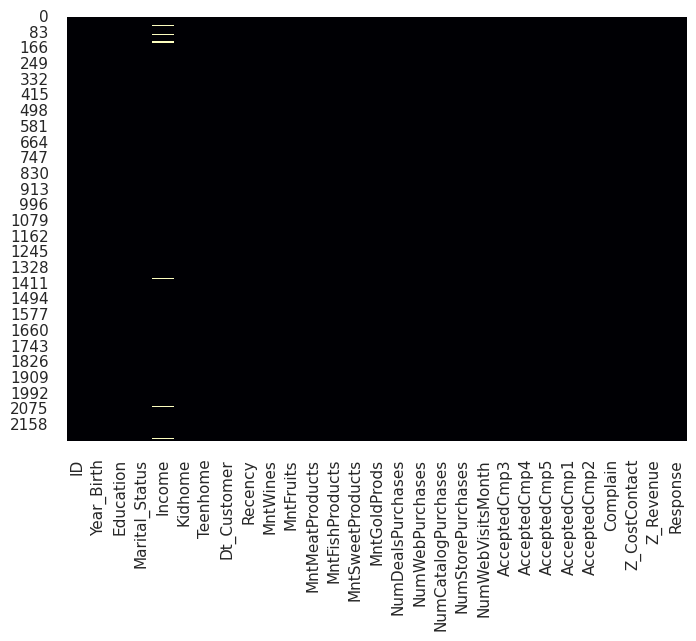

In [ ]:
# Write your code here

sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

#We create our heatmap for finding in visual way our missing data

In [ ]:
print(data.isnull().sum())
# Then we search the count of our missing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
dt = data[data['Income'].isnull() == True]
dt.shape

# There are 24 rows nulls of income, for solving this problem as we have more than 2000 data,
# we could delete, but as long we want to keep all the information posible we can change for median



(24, 29)

In [ ]:
data_copy = data.copy() ## This will be our copy with the original data
# before dropping or making changes on our data

data.Income.fillna(data.Income.median(), inplace = True)
# We change the null values for the median, and we change the info of the data

### 📌 **Observations**

- ⚠️ There are **24 rows with missing values**, all located in the **`Income`** column, as visualized in the heatmap.
- 🧪 To handle this, we created a **copy of the dataset** to preserve the original data.
- 🛠️ The missing values were filled using the **median income**, which is a robust approach to avoid distortion by outliers.


#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# Write your code here

data[data.duplicated()]
# There is no duplicated rows

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [ ]:
data.drop(columns = ['Dt_Customer','Year_Birth','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education', 'Marital_Status']
, axis = 1, inplace = True)

# We drop columns that are nos meaningful for reflecting our custumer behavior


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   Kidhome              2240 non-null   int64  
 2   Teenhome             2240 non-null   int64  
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  Complain             2240 non-null   i

### 📌 **Observations**
1. ✅ There are **no duplicate rows**, which means all records in the dataset are **unique**.
2. 🧹 To enhance analysis and focus on meaningful features, we **dropped irrelevant columns**:
   - 🔻 **Removed columns:** `ID`, `Dt_Customer`, `Z_CostContact`, `Z_Revenue`, `Year_Birth`, `Education`, `Marital_Status`.
   - 🎯 **Reasoning:**
     - `ID`, `Dt_Customer`, and `Z_CostContact` do **not provide behavioral insights**.
     - `Education` and `Marital_Status` were removed since we are focusing on **numerical features**, and these were not label-encoded.


###  We are gonna prepare our data for EDA

In [ ]:
data_num = data.select_dtypes(include = [np.number]).columns.tolist()
# We select our numerical data in a list called data_num
# At the same time is good remembering that our data is numerical all of these


print(data_num)
print(len(data_num))
# Let's get our numerical data for our model



['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']
17


## **Exploratory Data Analysis**

## Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [ ]:
## Here we are gonna make for numerical variables:
'''
Income
Kidhome
Teenhome
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
Complain
Response
'''

'\nIncome\nKidhome\nTeenhome\nRecency\nMntWines\nMntFruits\nMntMeatProducts\nMntFishProducts\nMntSweetProducts\nMntGoldProds\nNumDealsPurchases\nNumWebPurchases\nNumCatalogPurchases\nNumStorePurchases\nNumWebVisitsMonth\nComplain\nResponse\n'


 Income 



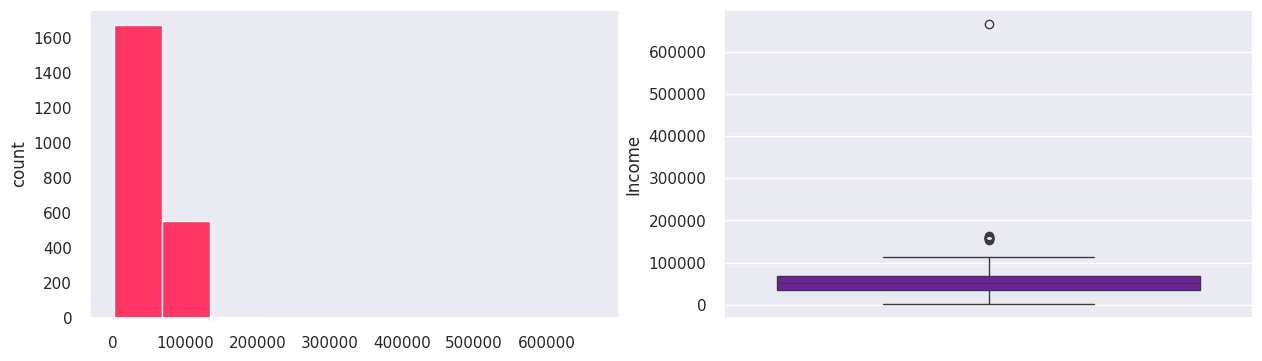


 Kidhome 



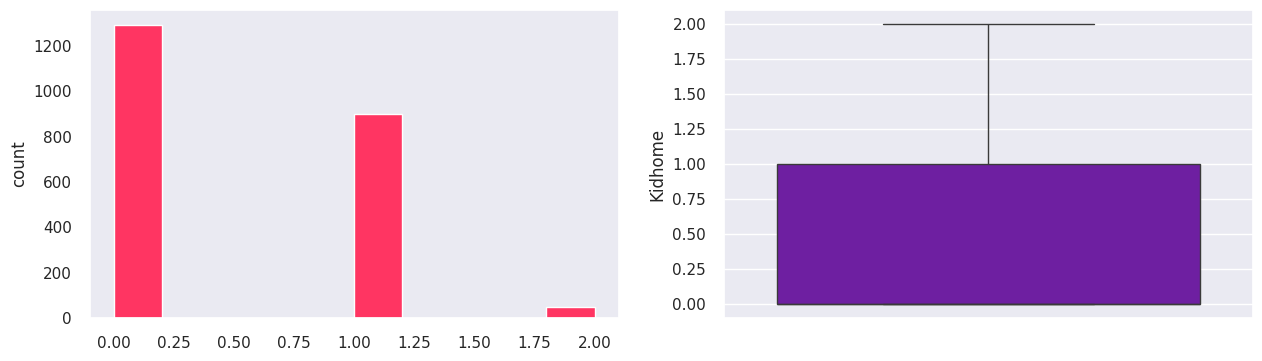


 Teenhome 



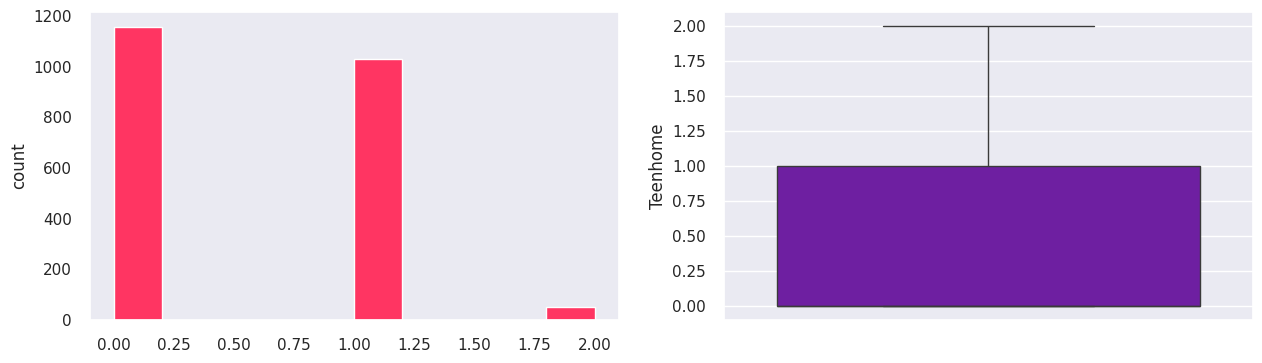


 Recency 



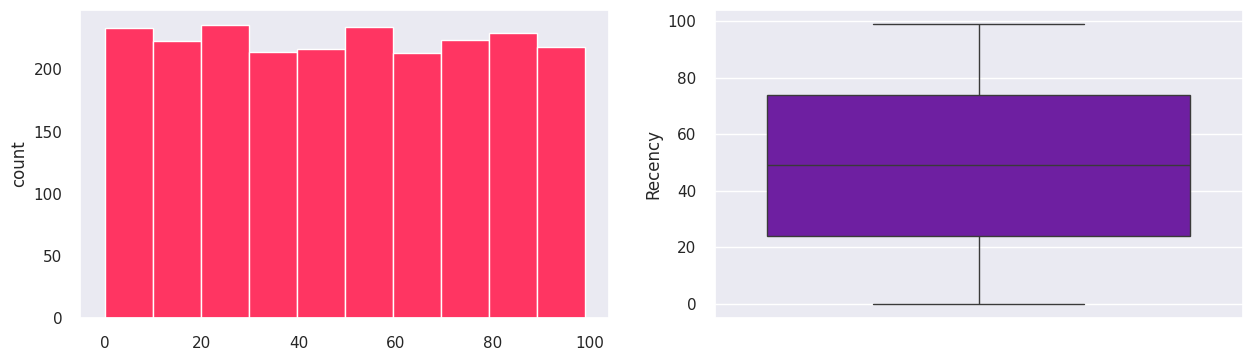


 MntWines 



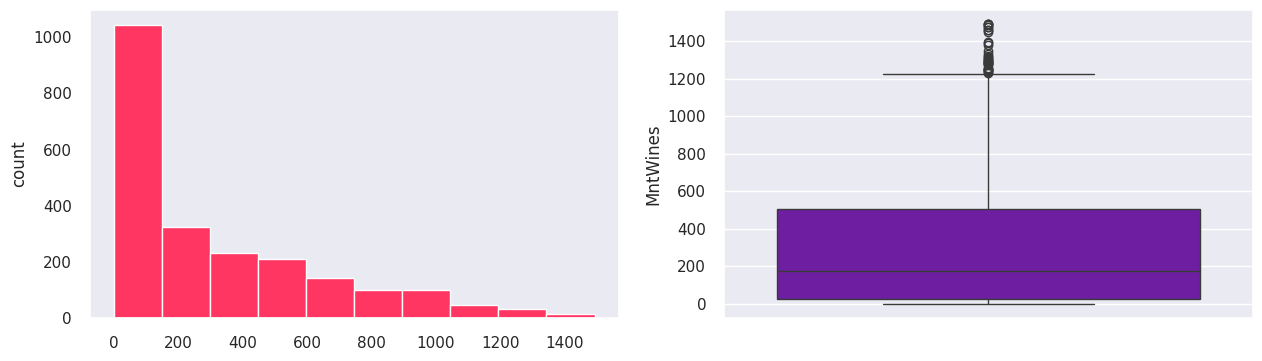


 MntFruits 



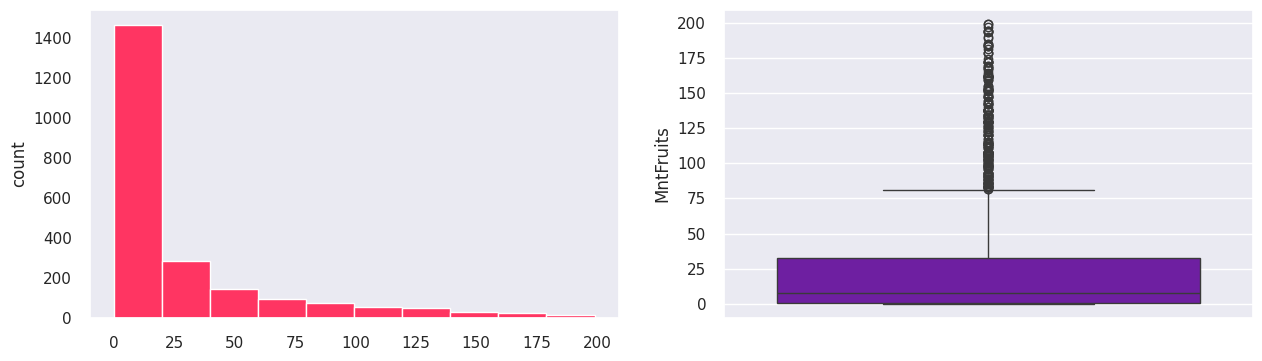


 MntMeatProducts 



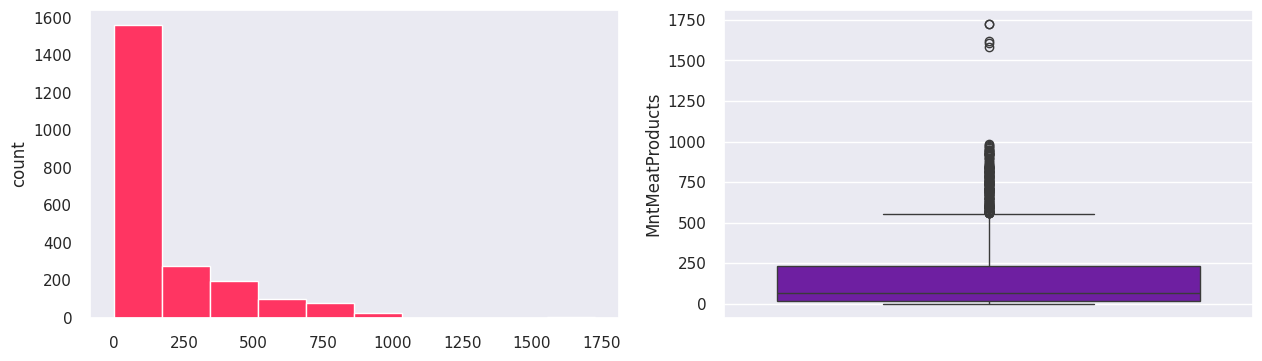


 MntFishProducts 



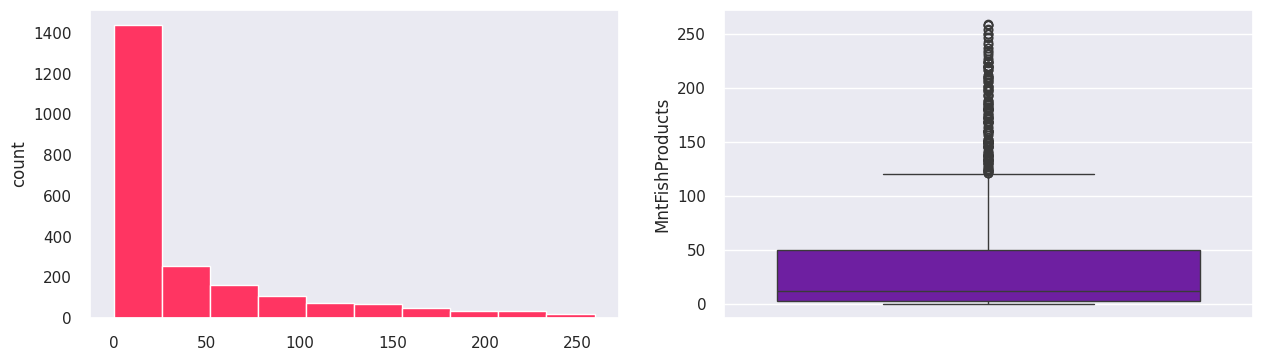


 MntSweetProducts 



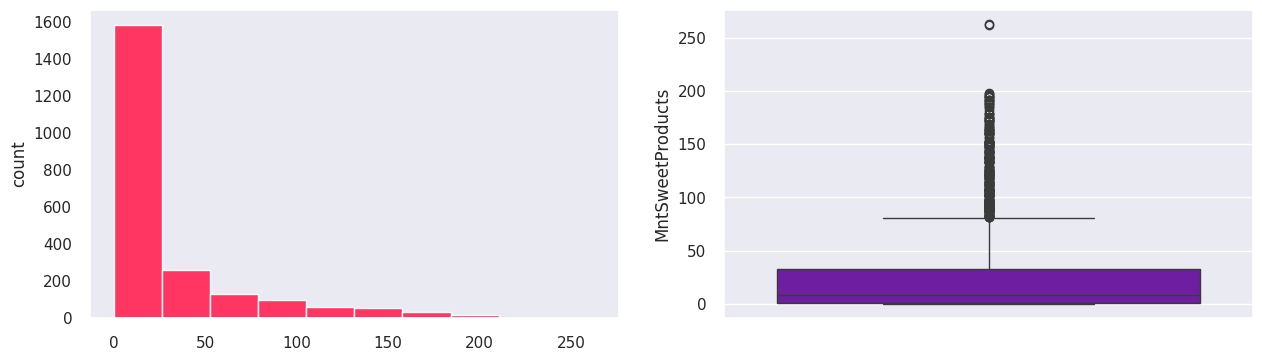


 MntGoldProds 



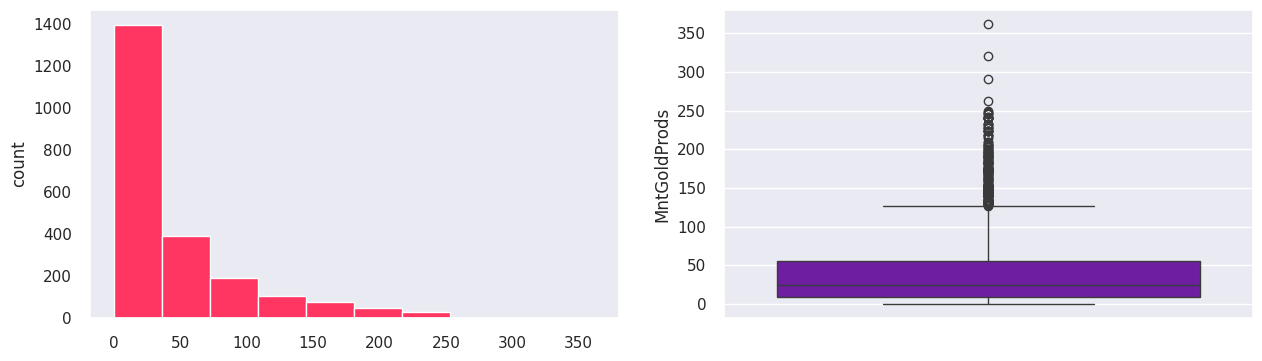


 NumDealsPurchases 



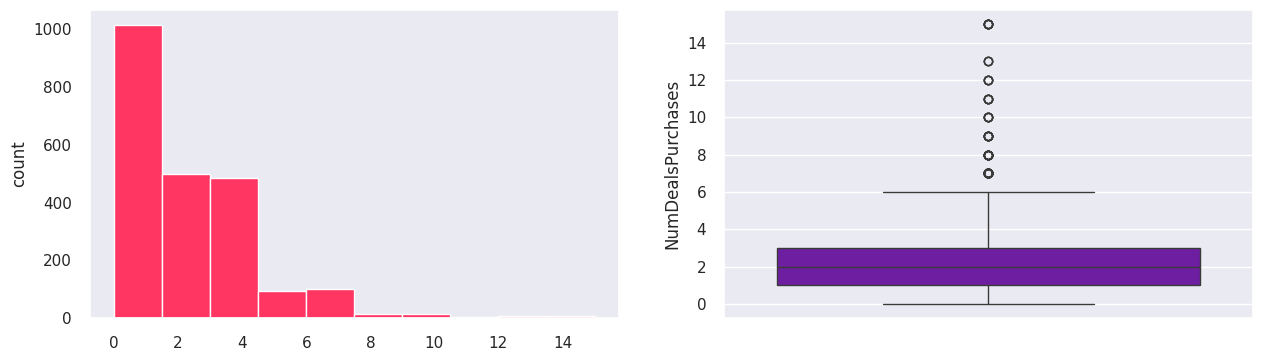


 NumWebPurchases 



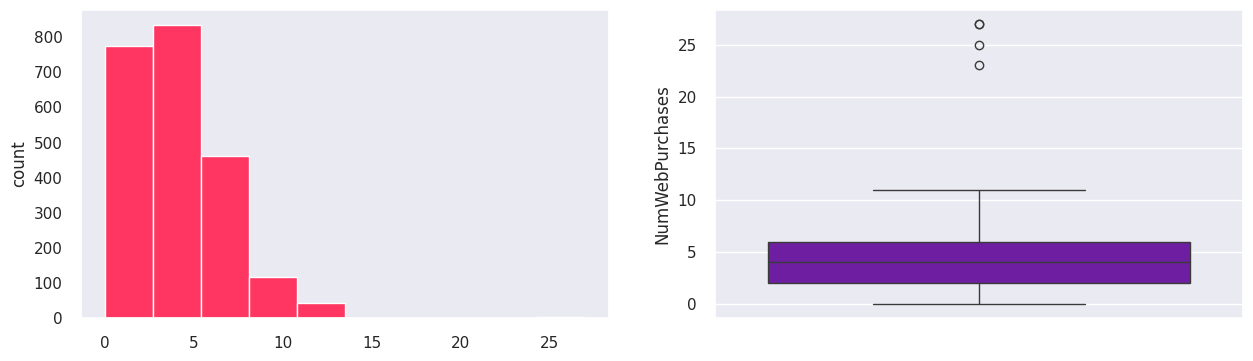


 NumCatalogPurchases 



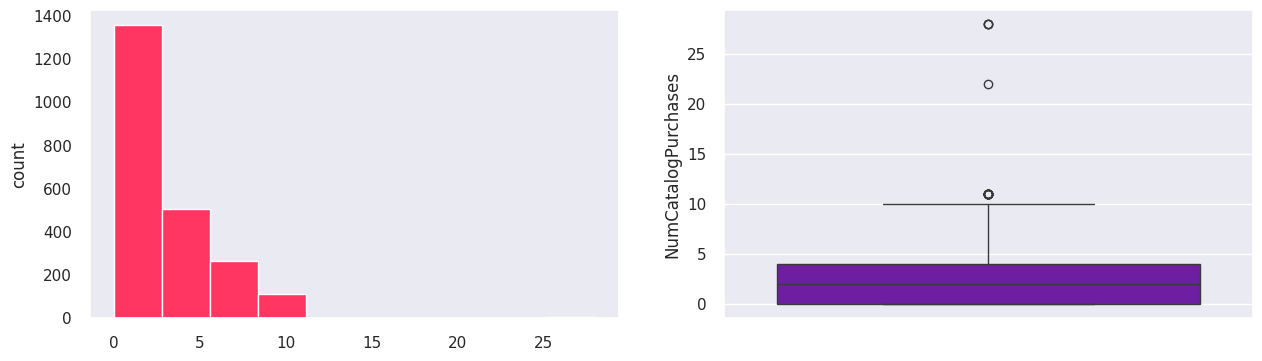


 NumStorePurchases 



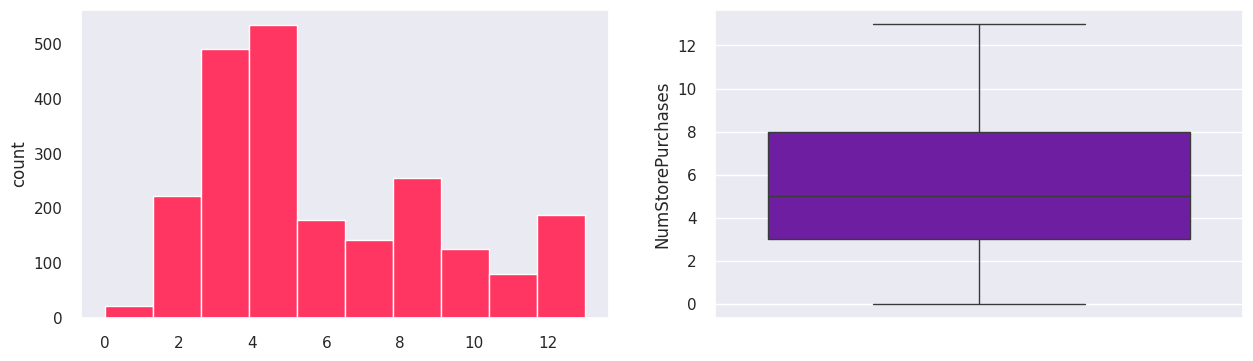


 NumWebVisitsMonth 



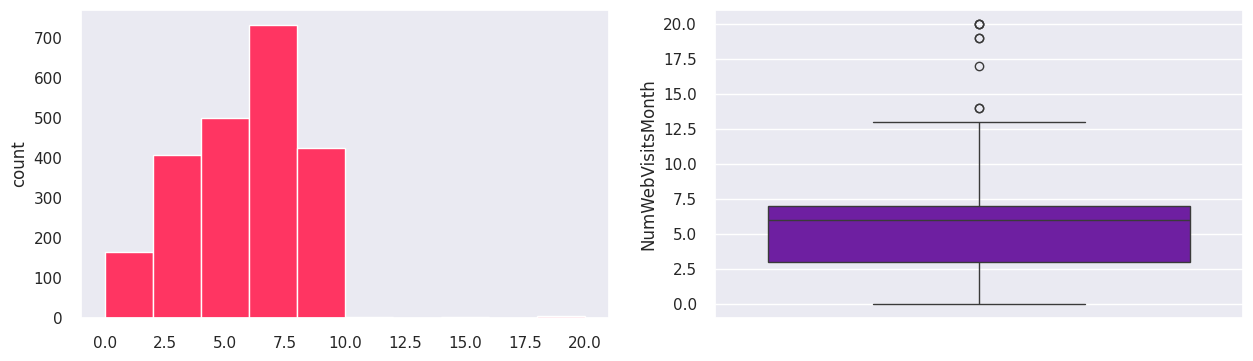


 Complain 



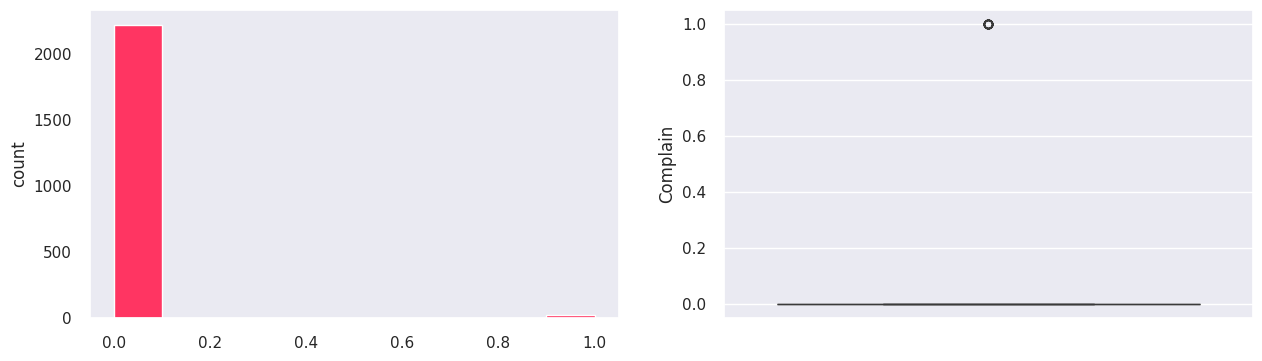


 Response 



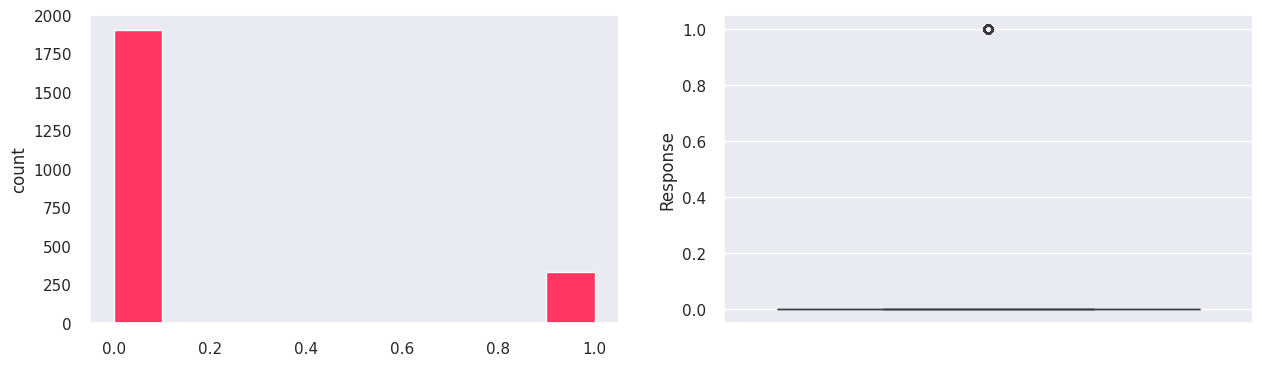

In [ ]:
# Write your code here

for i in data_num:

  sns.set(style = "darkgrid")
  print('\n',i, '\n')
  plt.figure(figsize= (15,4))
  plt.subplot(1,2,1)
  data[i].hist(bins=10, grid=False, color = '#ff3562')
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(data[i], color = '#7209b7')
  plt.show()

### 📊 **Observation**

- 👨‍👩‍👧 Most customers **do not have teenagers at home**, or at most **one**. Very few have two.
- 🕒 **Recency of purchases** is fairly **evenly distributed**, with no notable peaks.
- 🍷 **Wine spending** follows a **right-skewed distribution**: most spend little, and only a few spend significantly more.
- 🍖 Similar spending patterns are observed for:
  - 🍇 Fruits  
  - 🥩 Meat  
  - 🐟 Fish  
  - 🍬 Sweets  
  - 💍 Gold  
  - 🛍️ Discounted purchases  
  - 💻 Online shopping  

  In all cases, **most customers spend very little**, while a minority spend substantially more.

- 🙅‍♂️ A large portion of customers **have not filed complaints**, while a small group has.
- 📢 Most customers **did not respond** to any marketing campaigns, but a noticeable portion **did engage**.


## Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

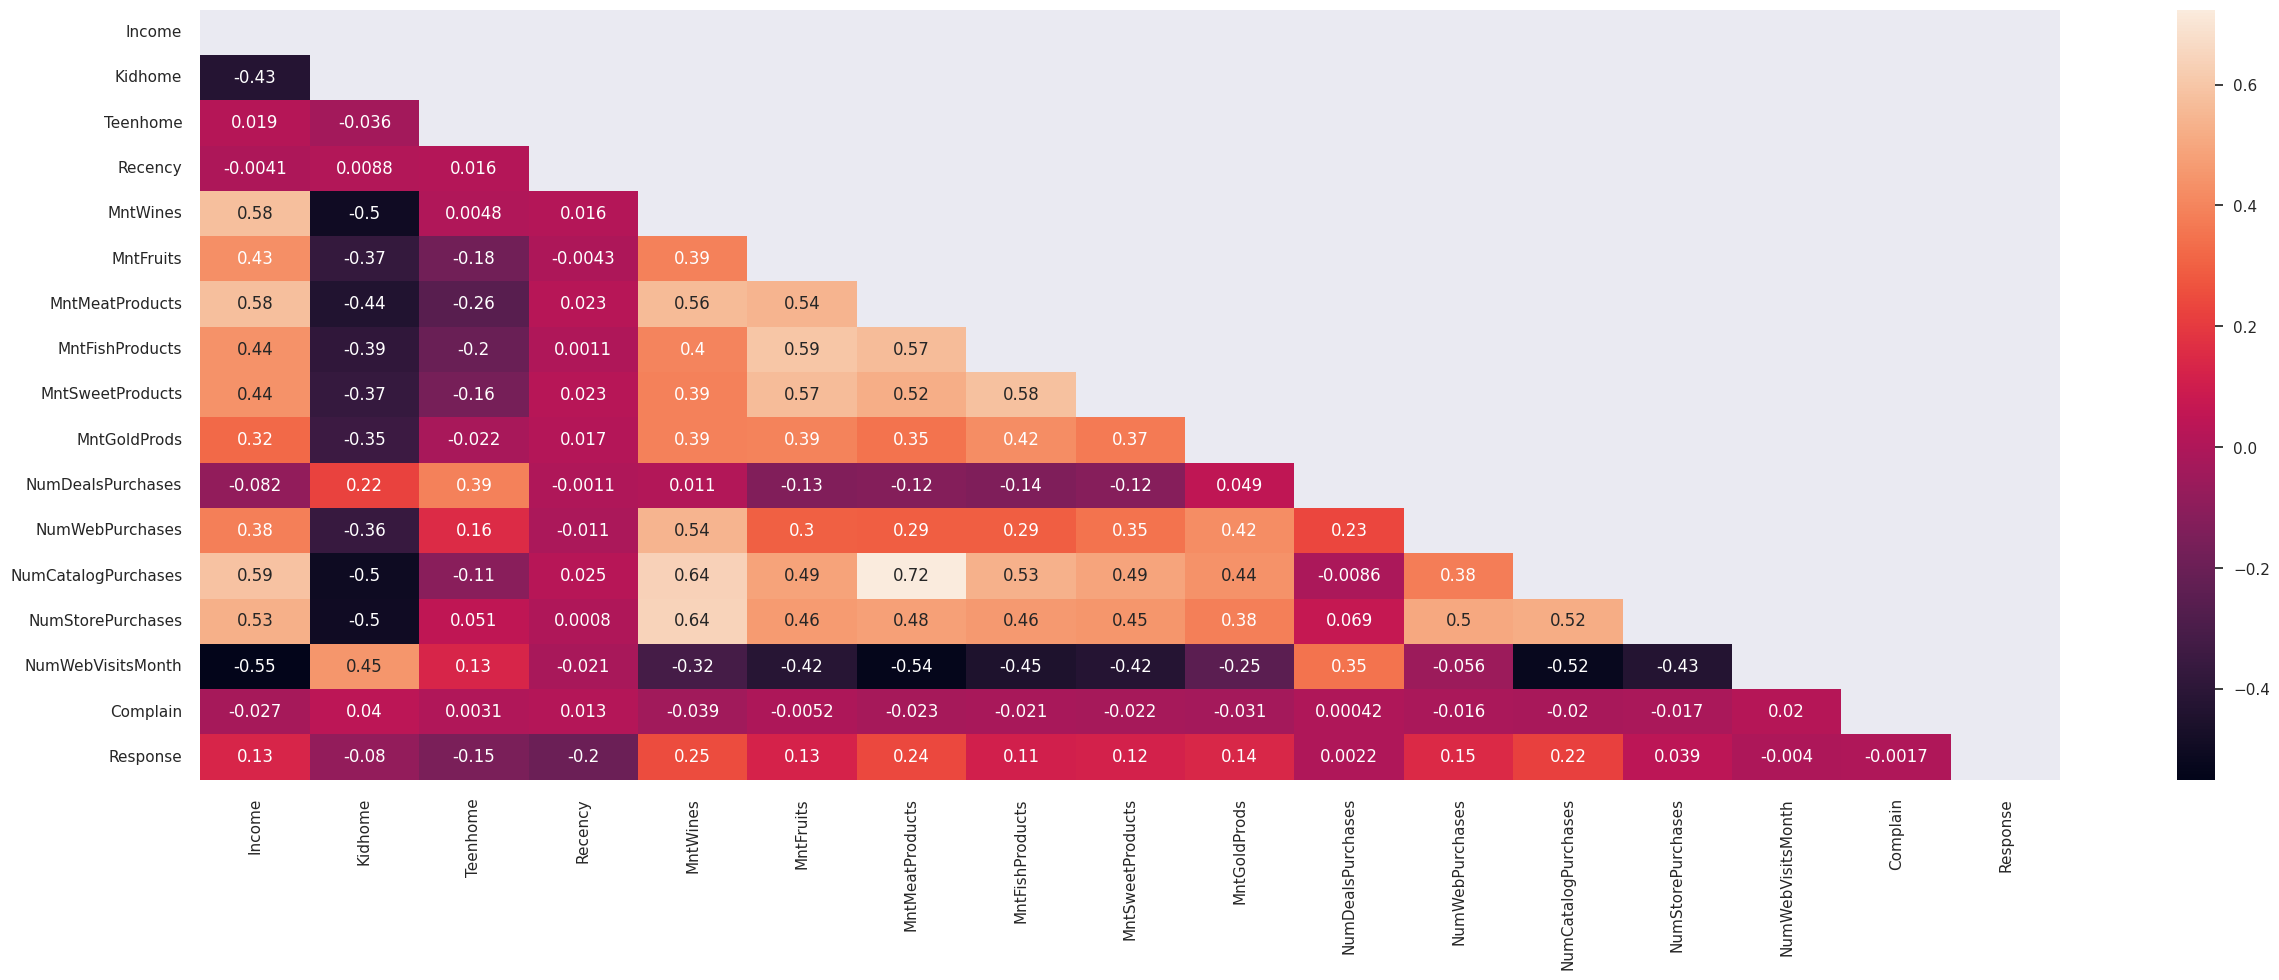

In [ ]:
mask = np.triu(np.ones_like(data.corr()))

sns.set(style = 'dark')
plt.figure(figsize = (30,10))
sns.heatmap(data.corr(),  annot= True, mask = mask);

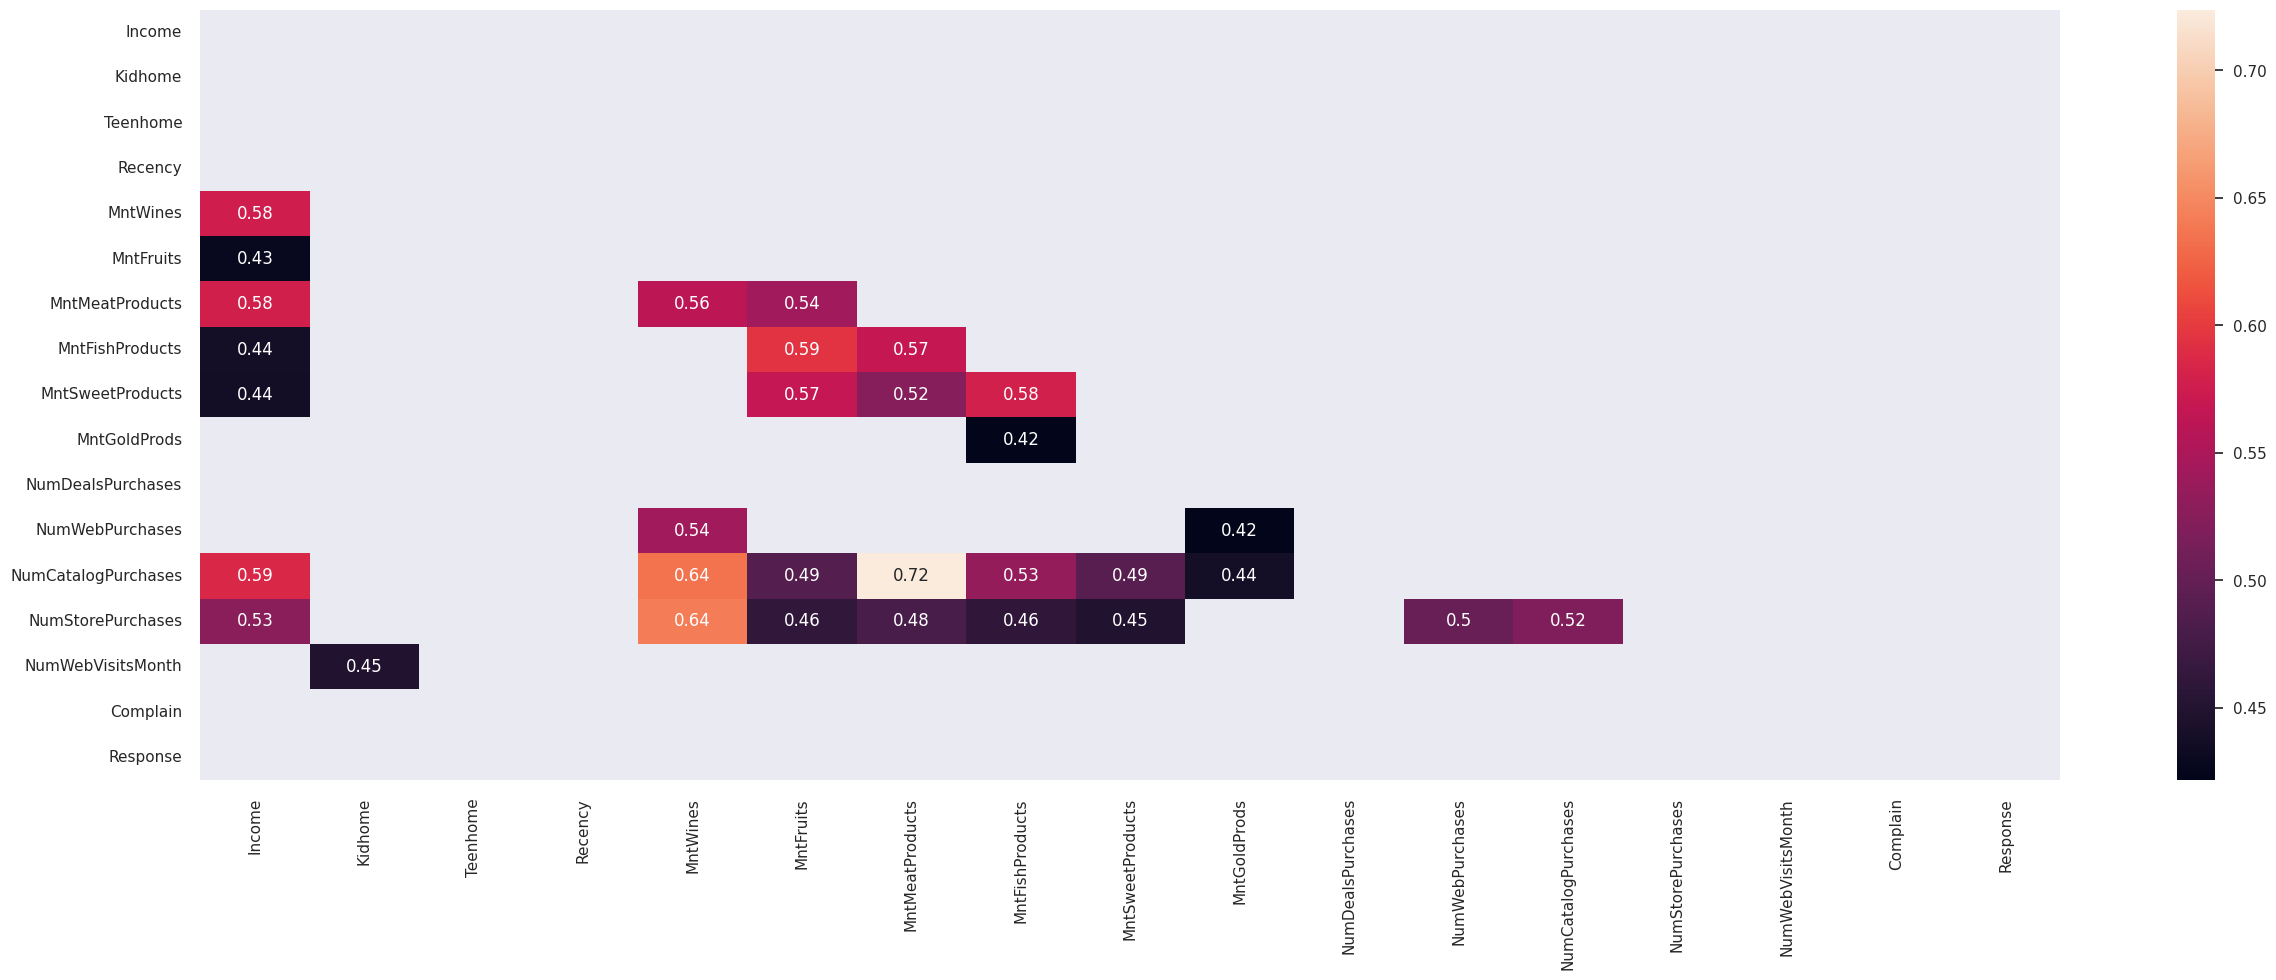

In [ ]:
mask = np.triu(np.ones_like(data.corr()))
mask = mask | (data.corr() <= 0.4)

# We create our mask for our correlation matrix, for finding our values greater than 0.4. So, we search the most corrlated variables

sns.set(style = 'dark')
plt.figure(figsize = (30,10))
sns.heatmap(data.corr(),  annot= True, mask = mask);


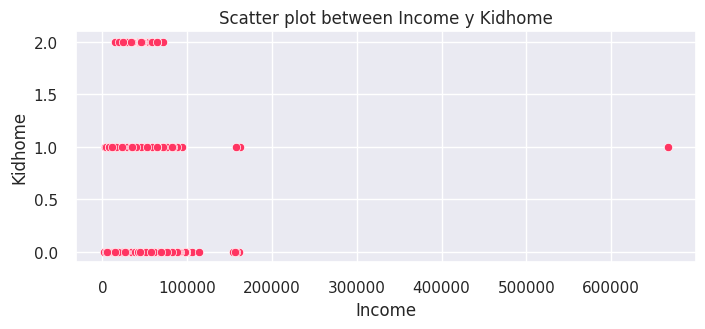

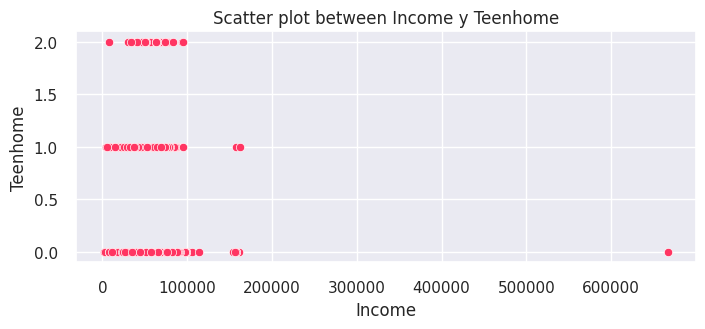

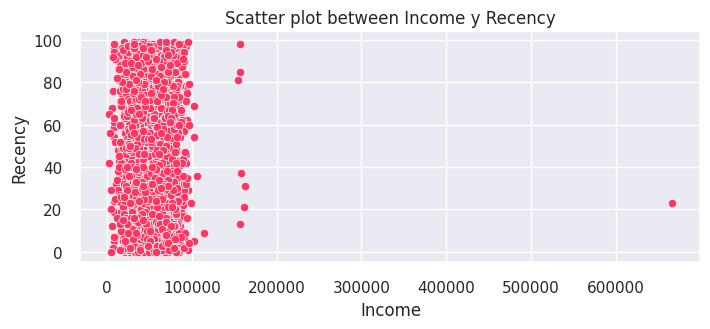

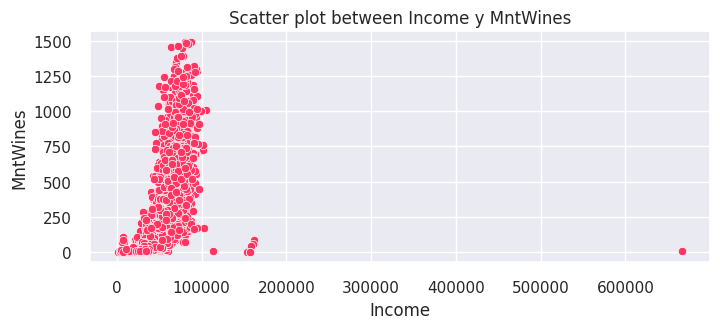

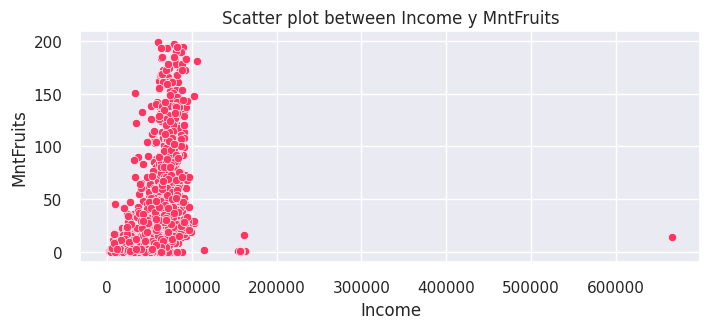

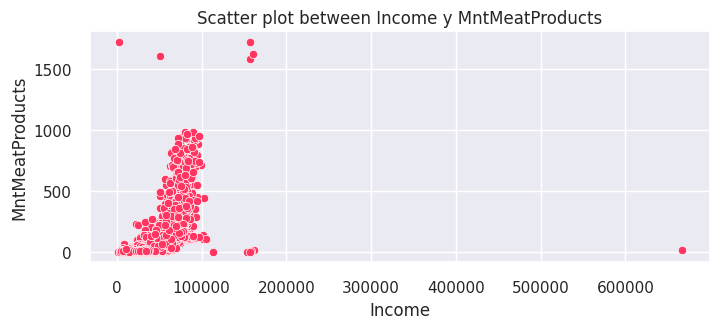

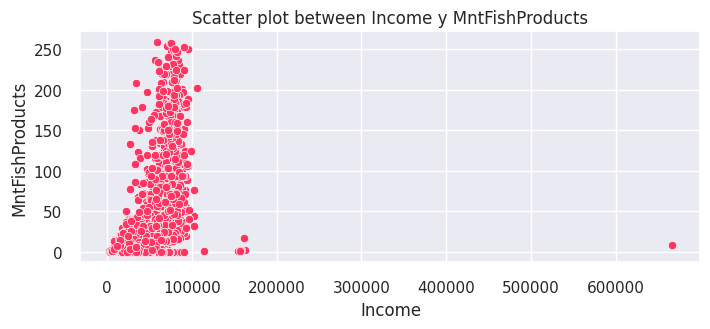

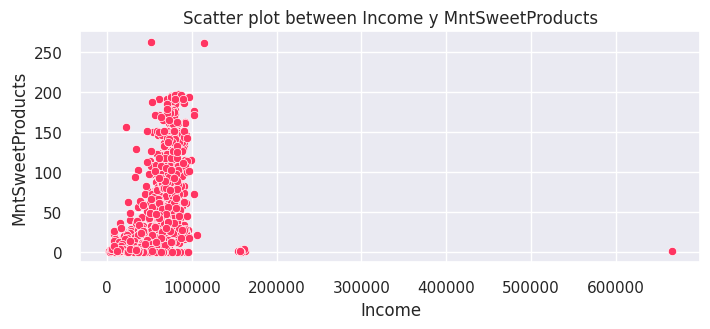

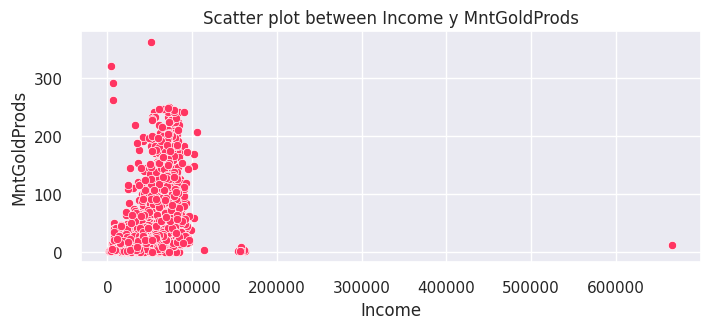

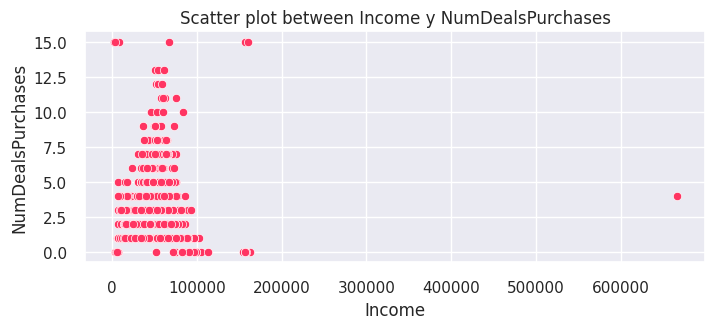

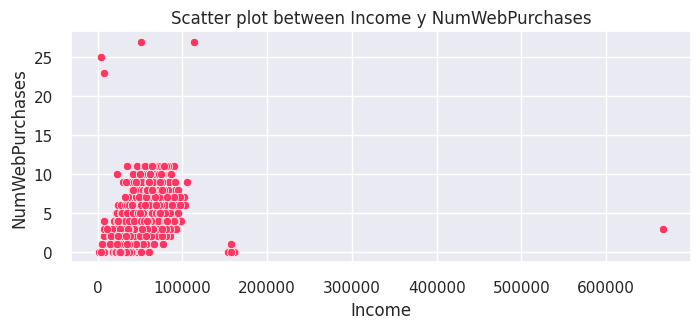

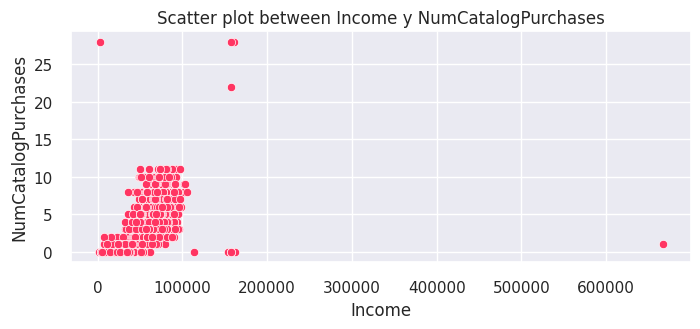

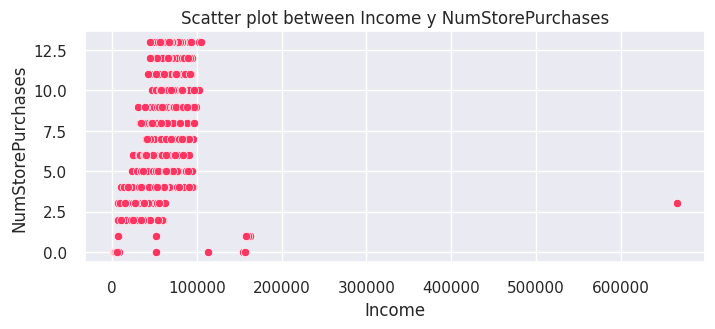

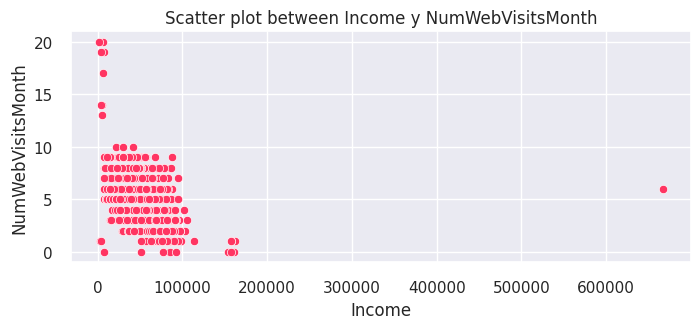

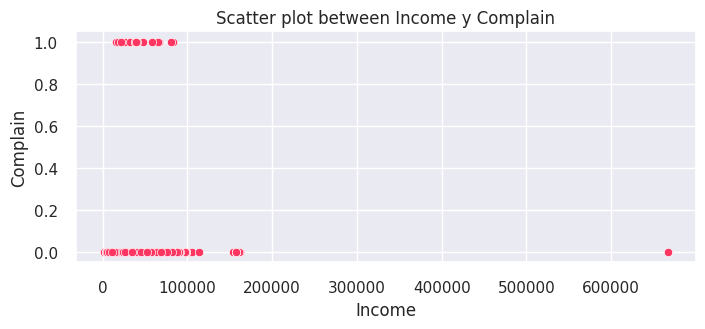

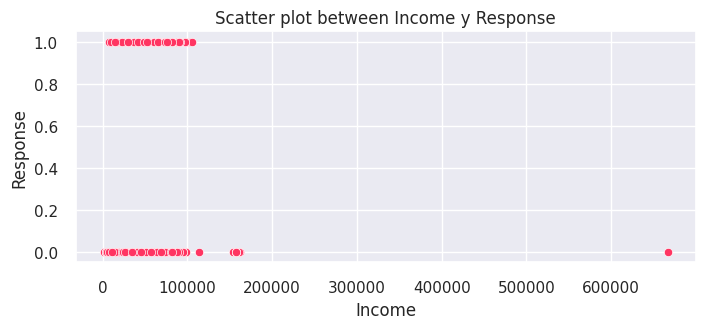

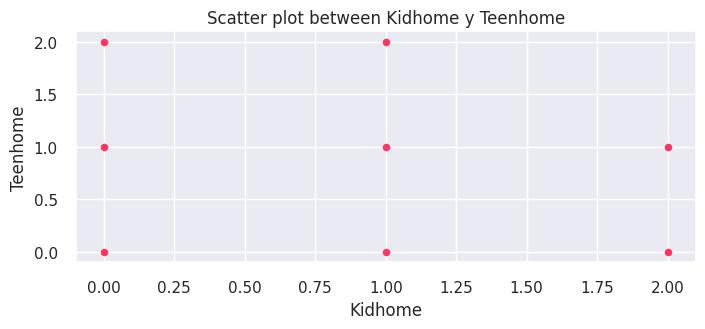

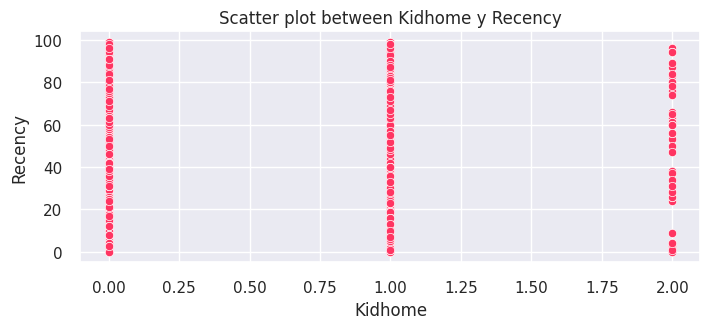

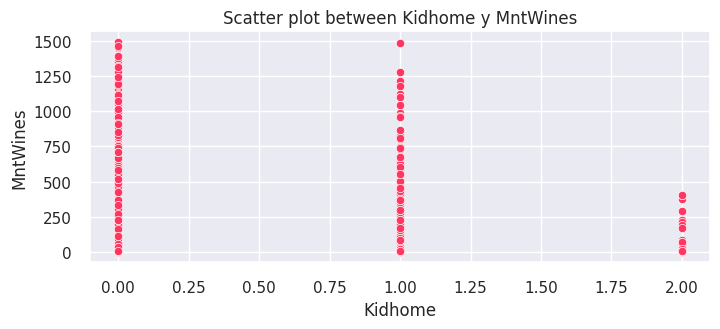

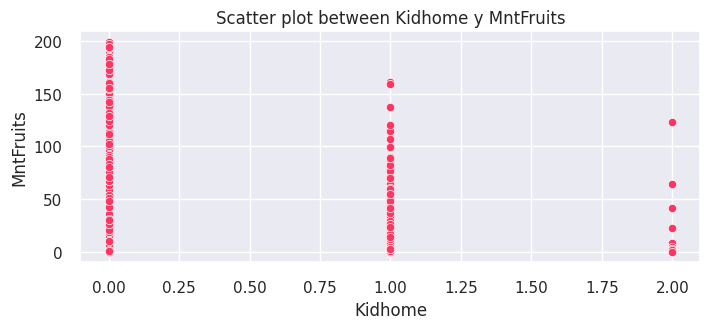

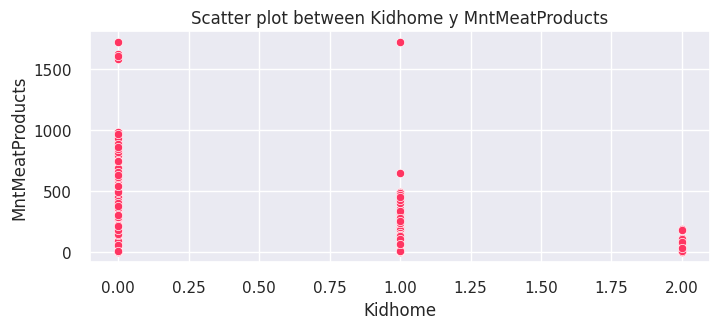

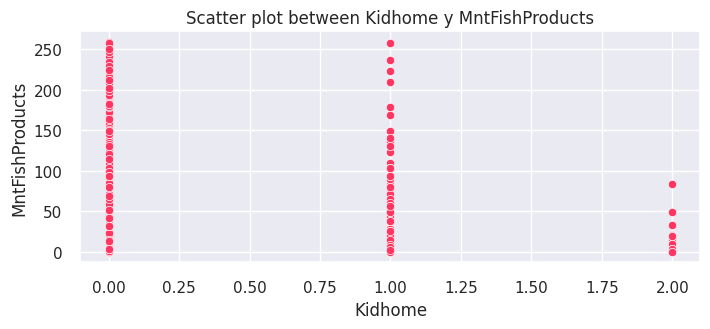

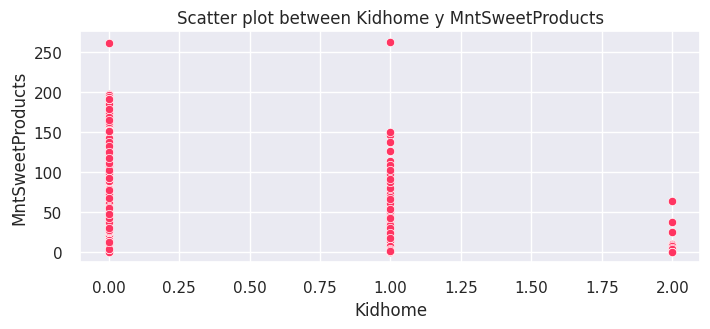

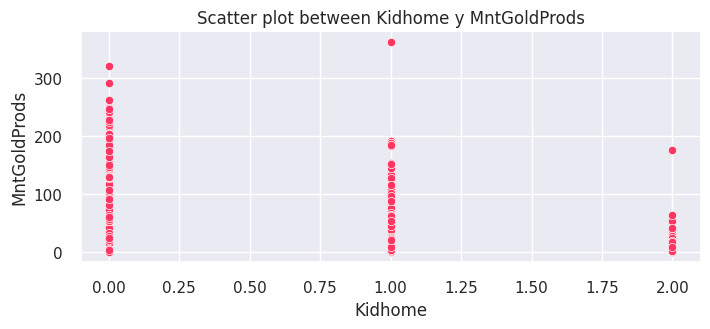

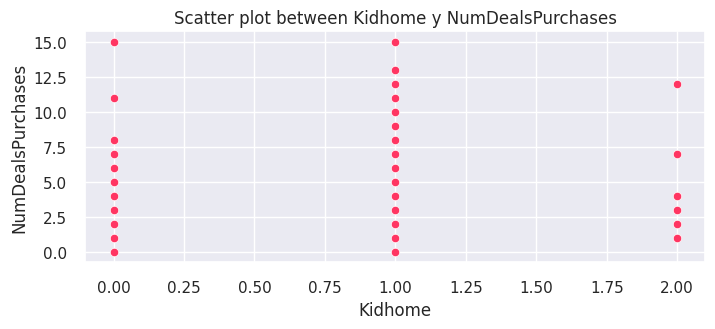

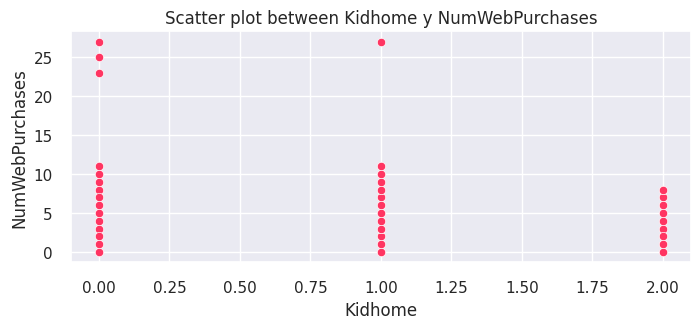

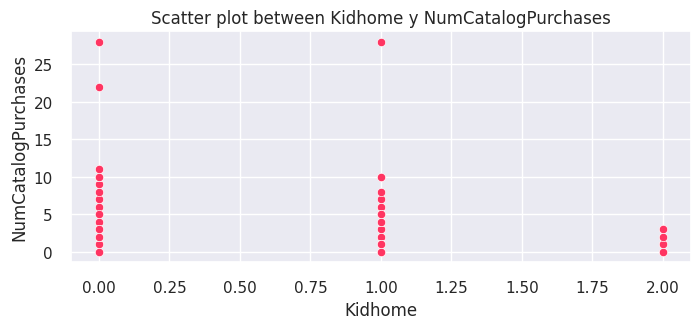

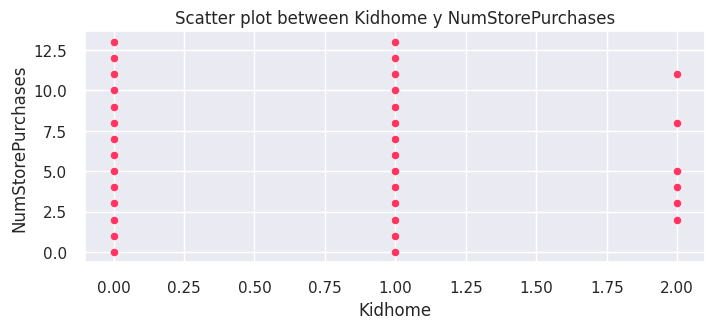

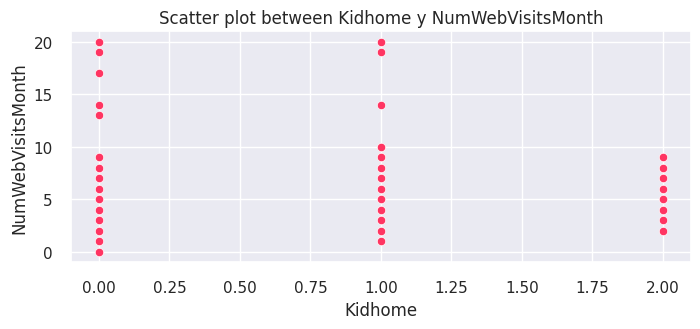

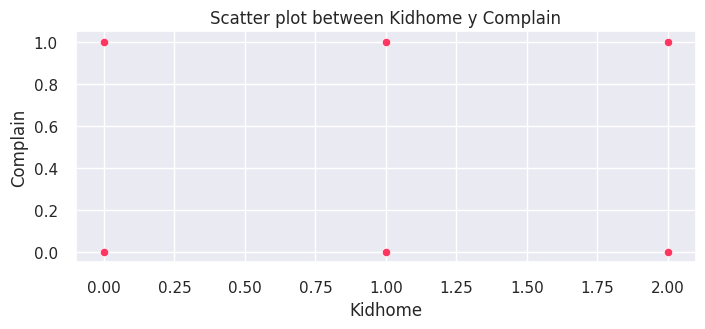

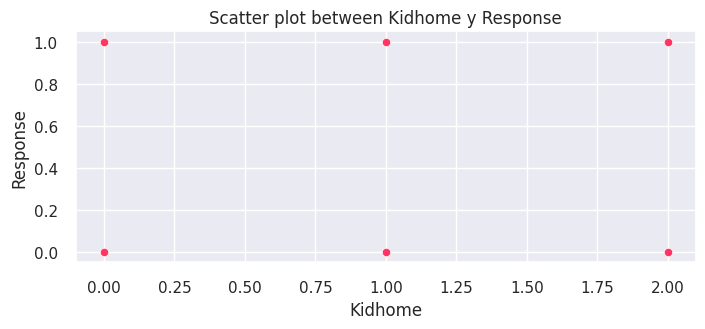

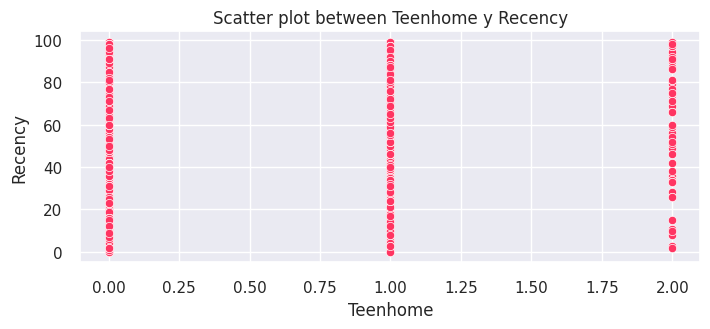

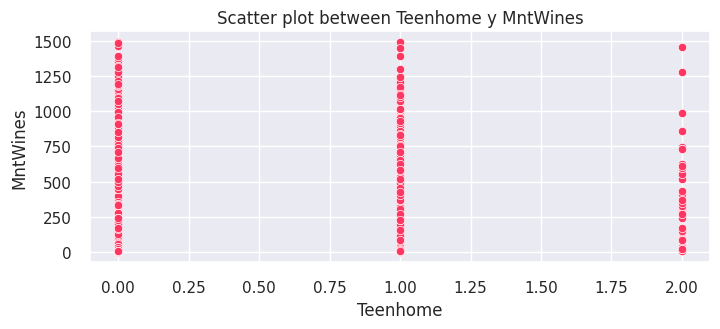

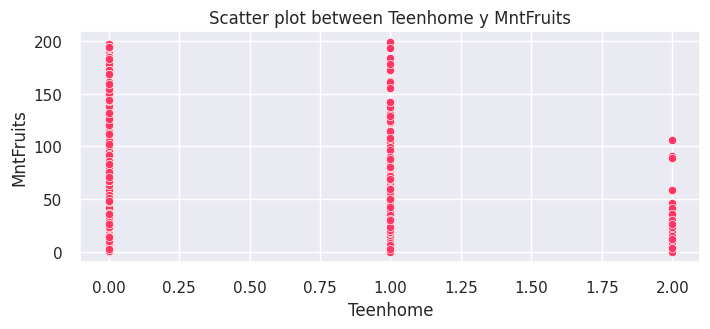

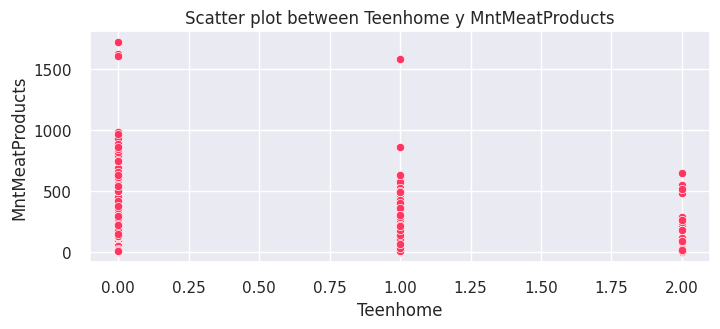

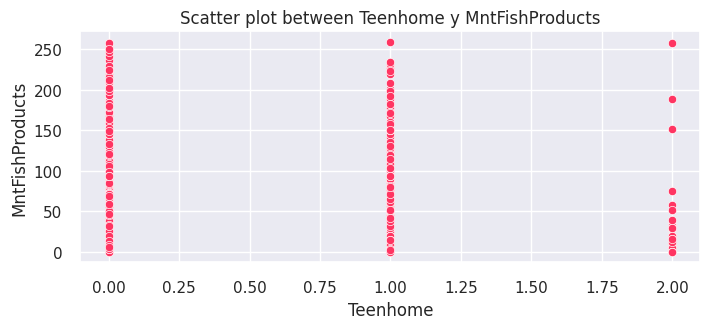

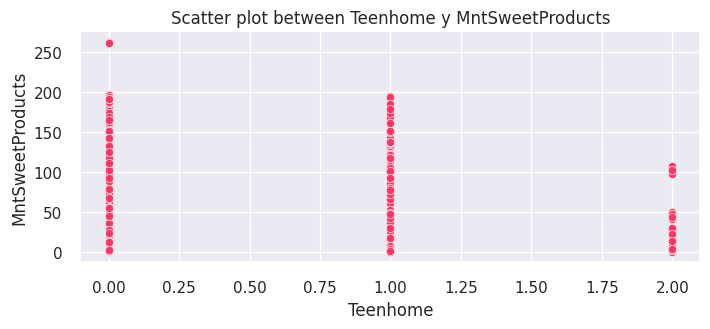

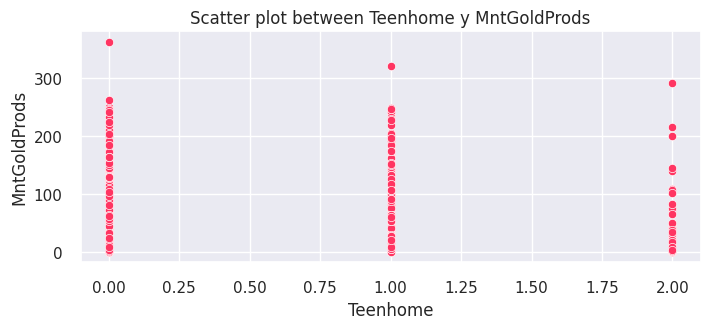

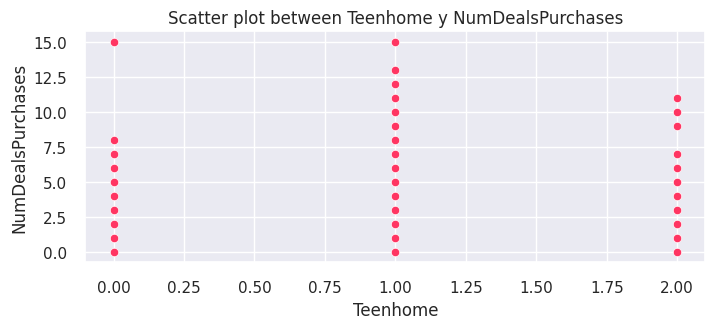

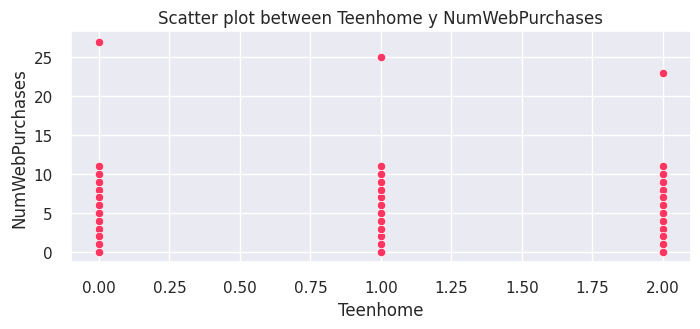

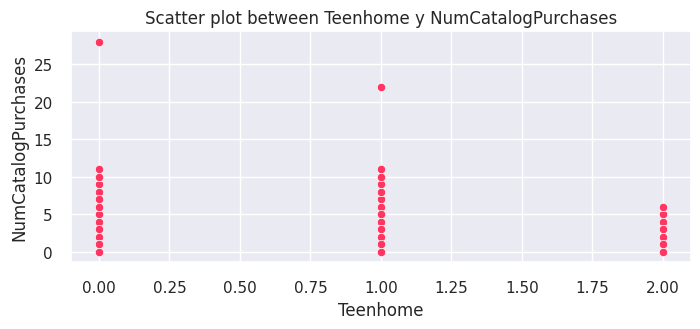

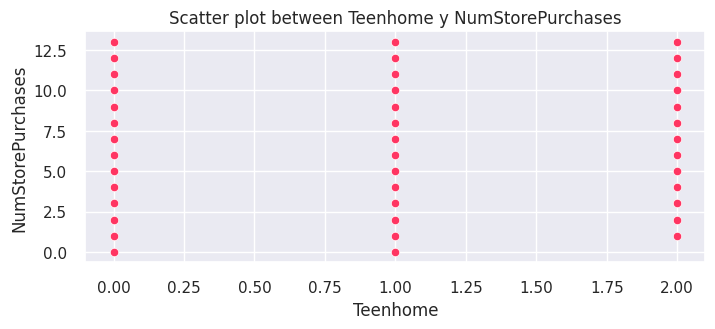

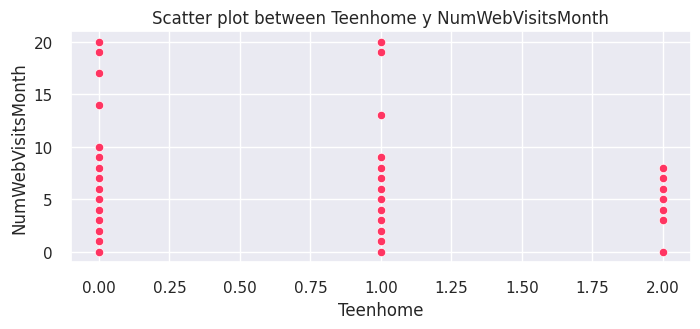

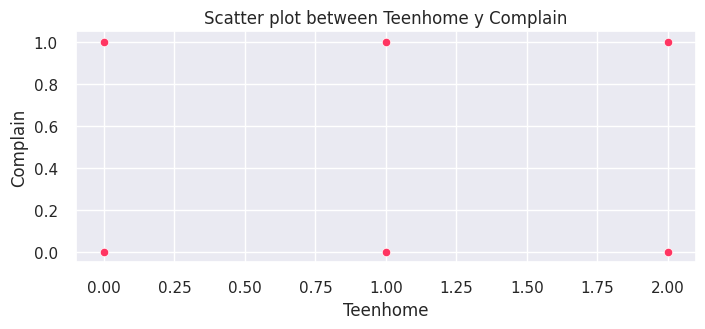

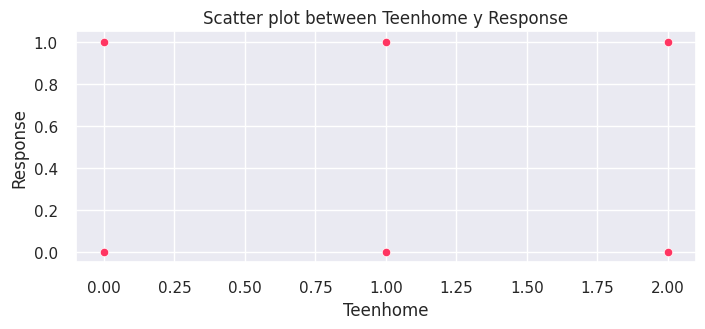

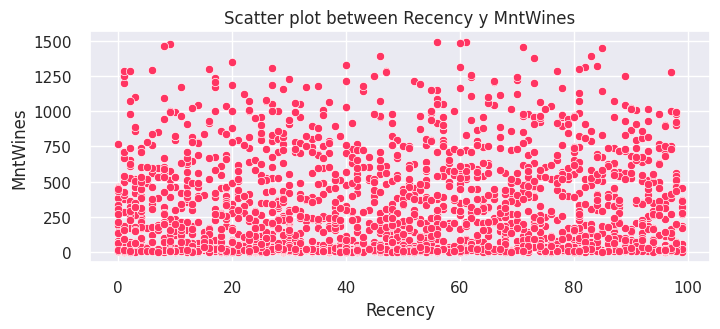

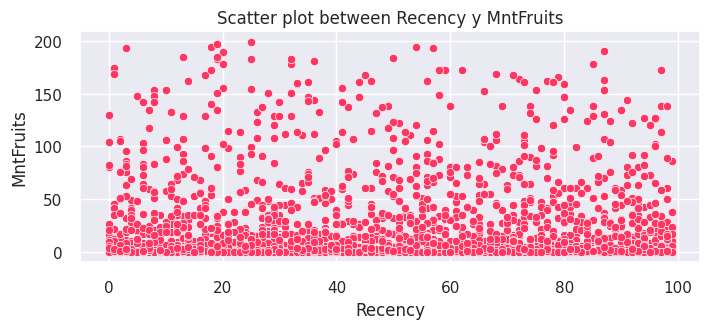

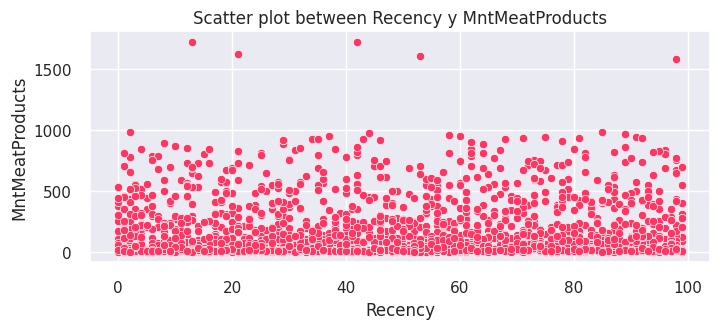

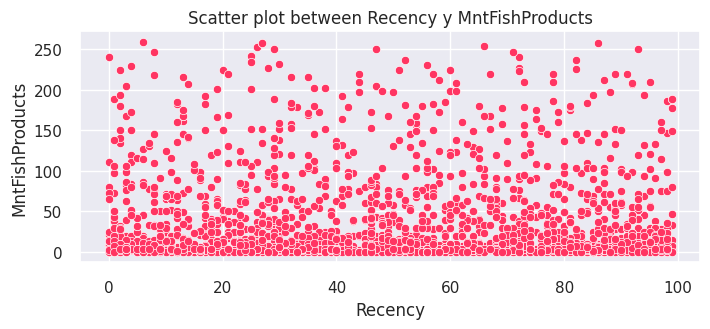

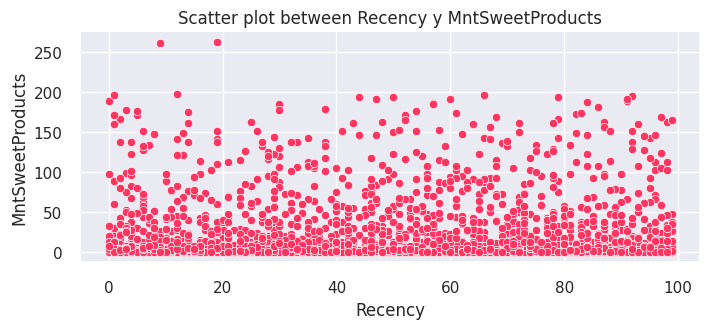

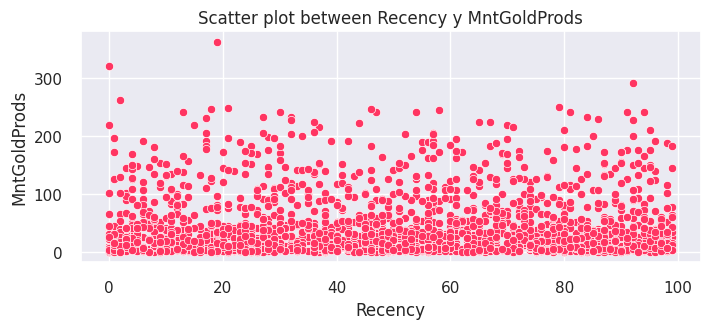

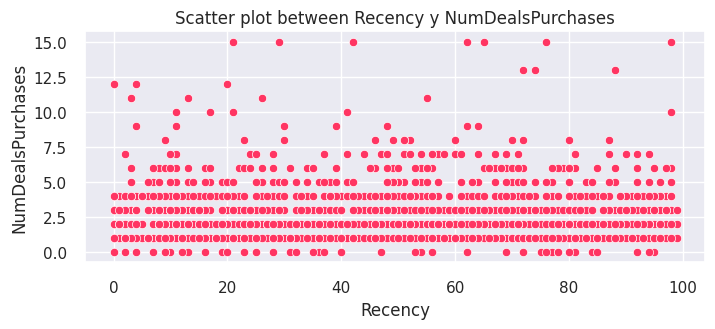

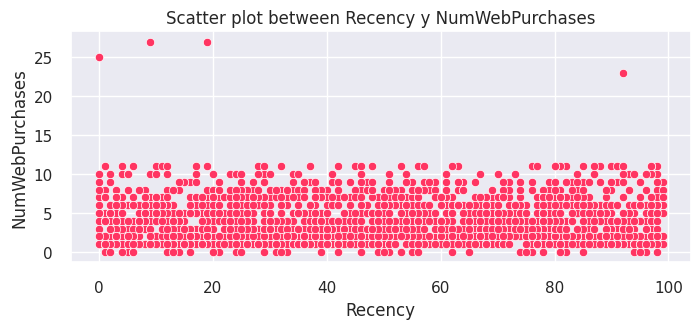

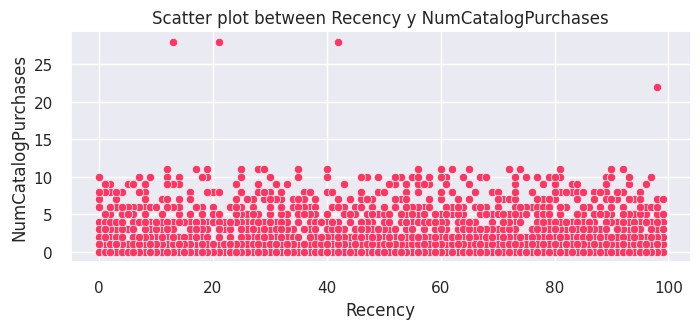

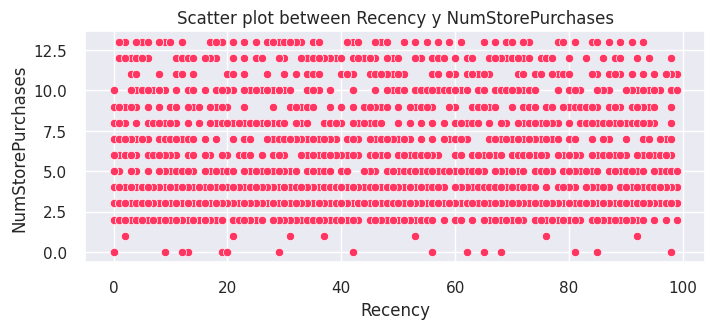

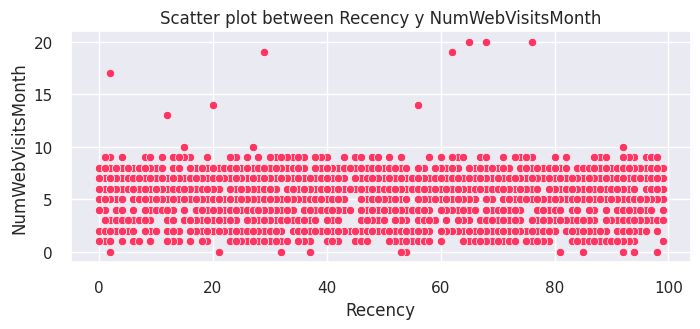

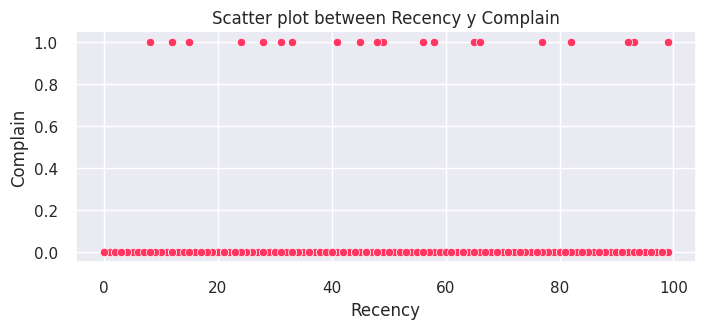

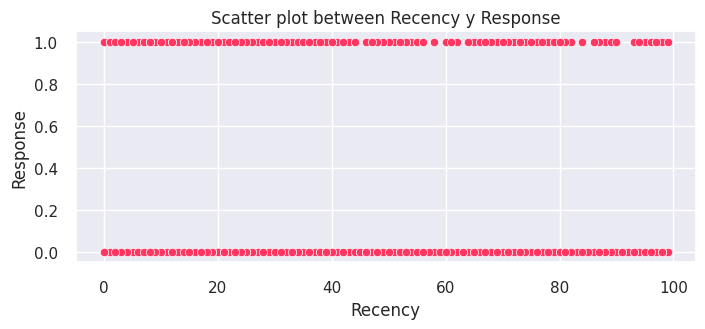

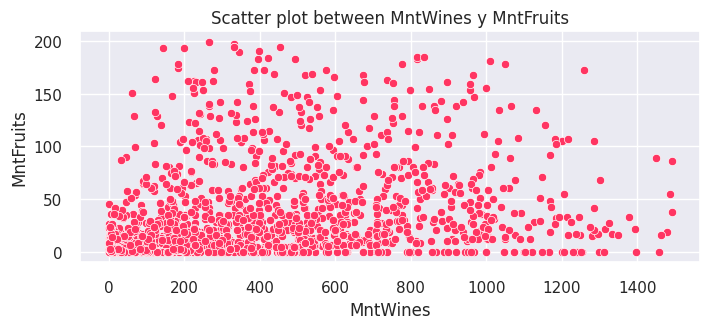

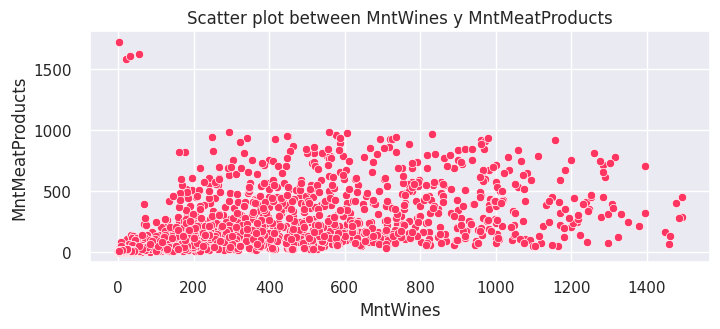

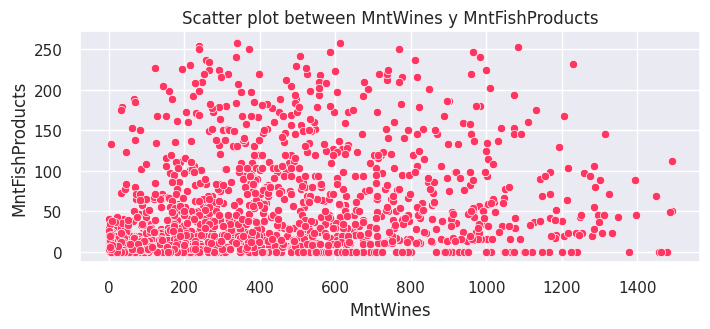

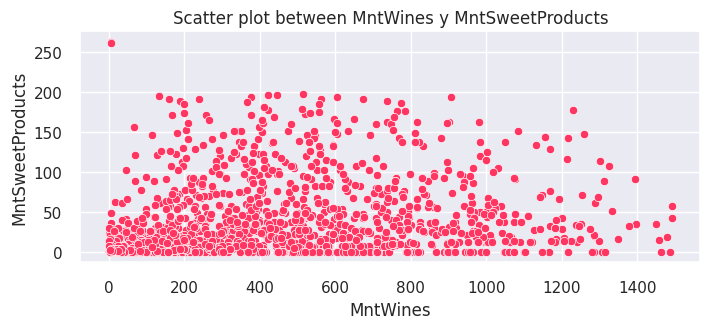

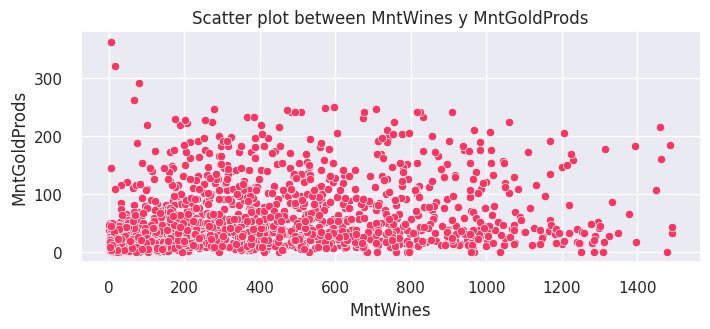

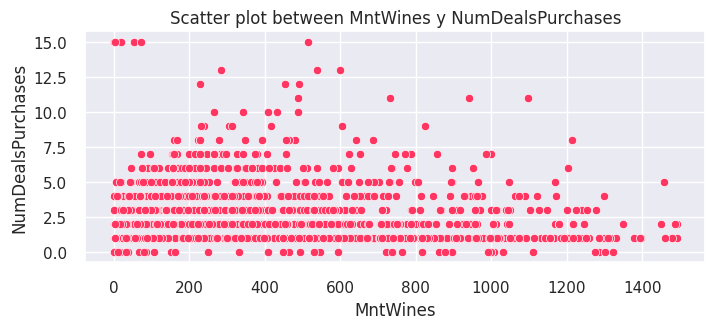

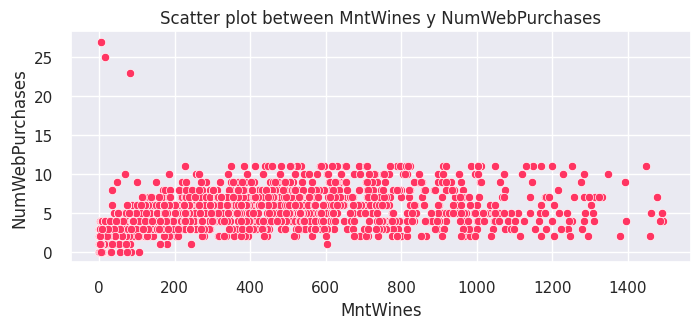

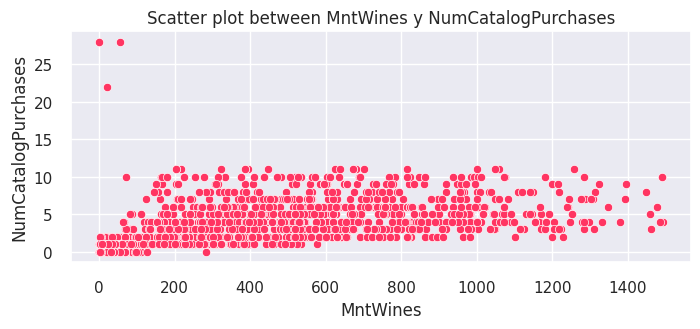

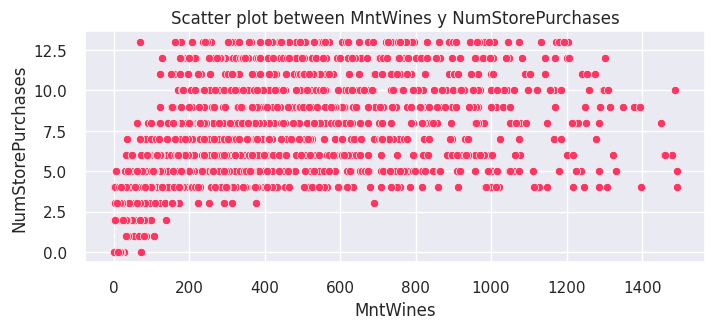

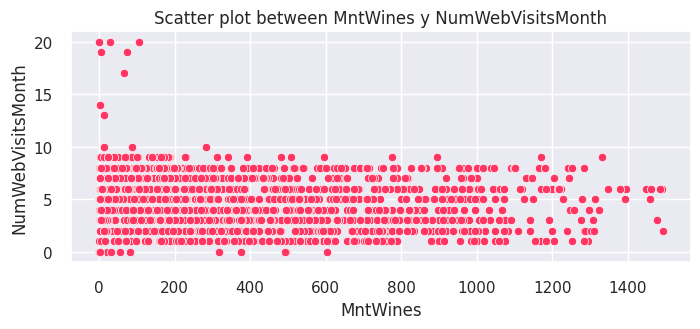

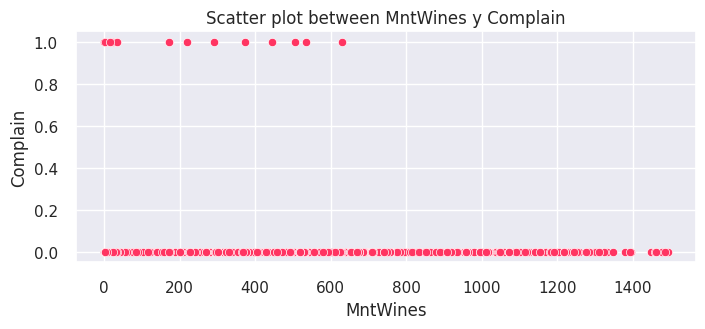

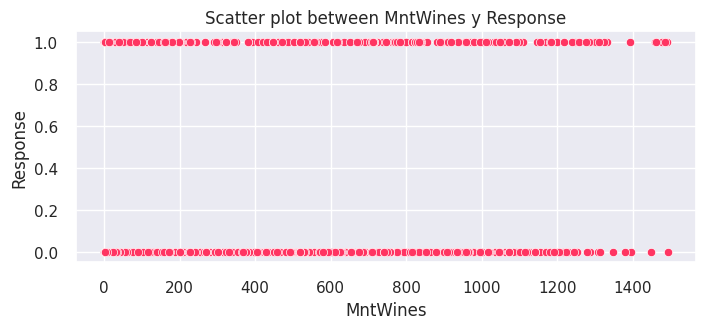

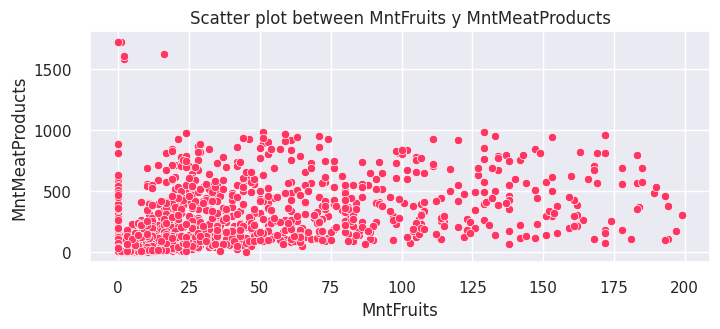

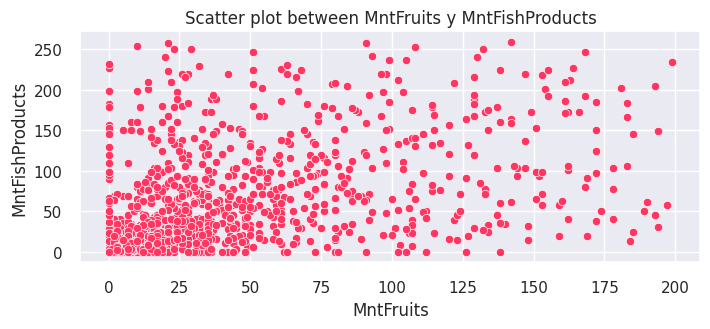

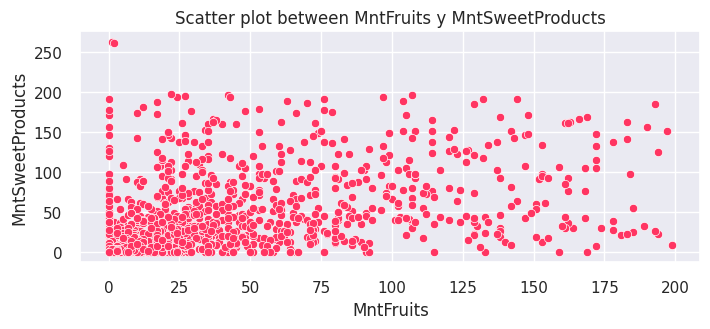

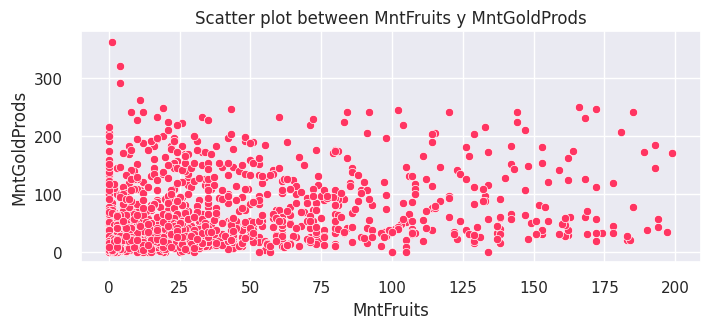

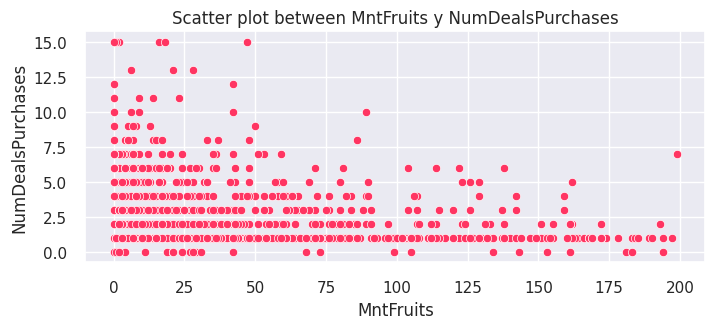

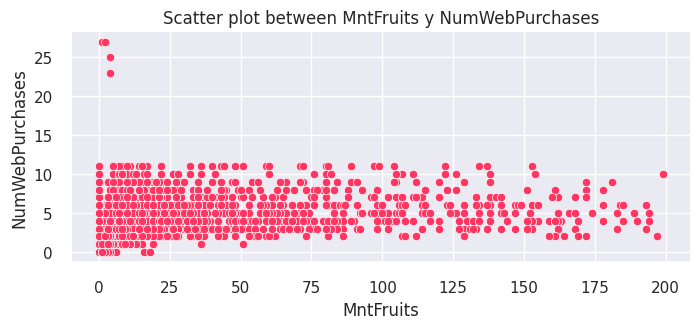

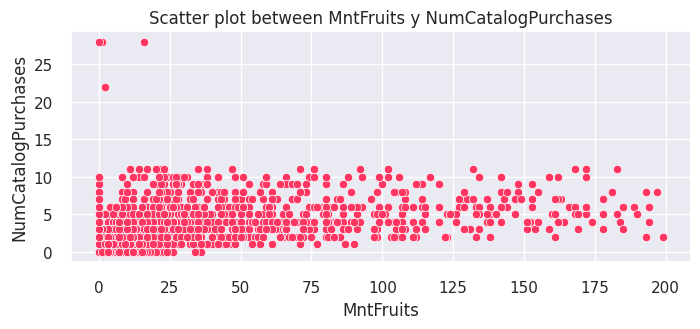

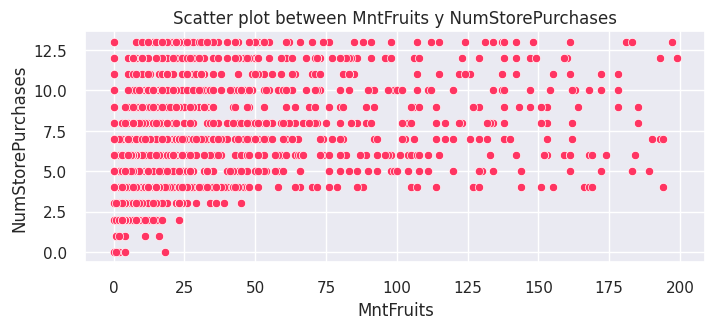

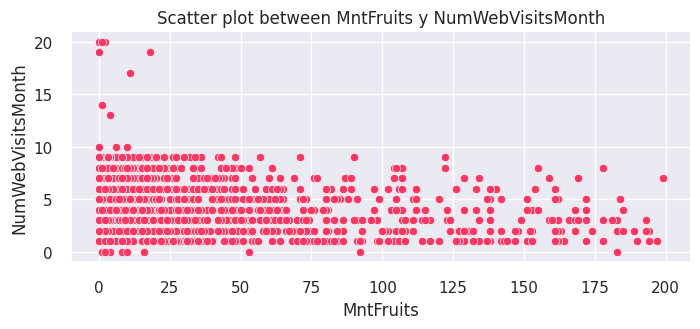

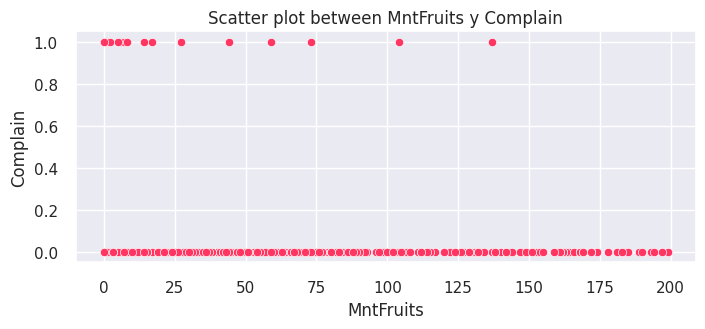

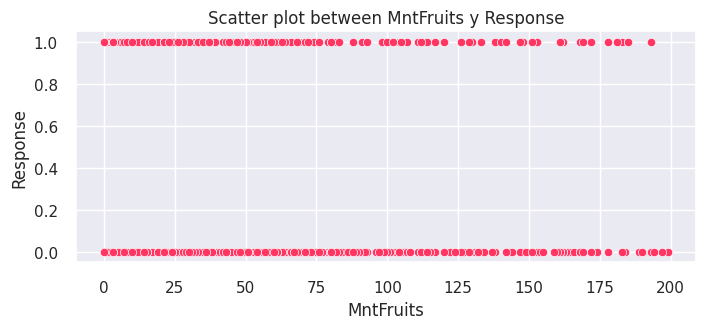

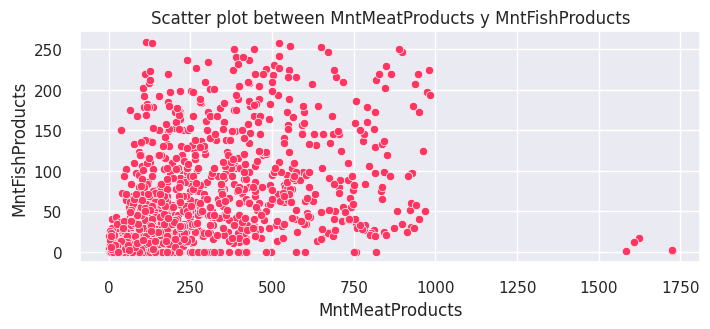

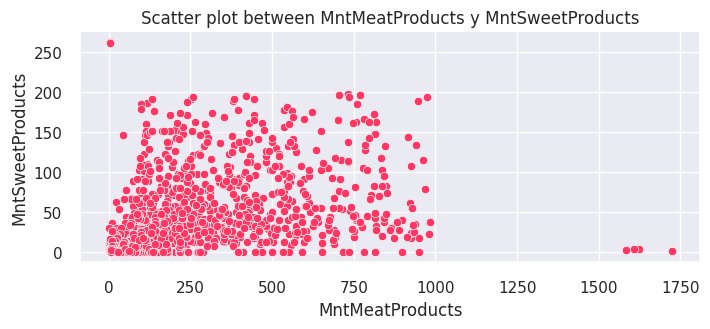

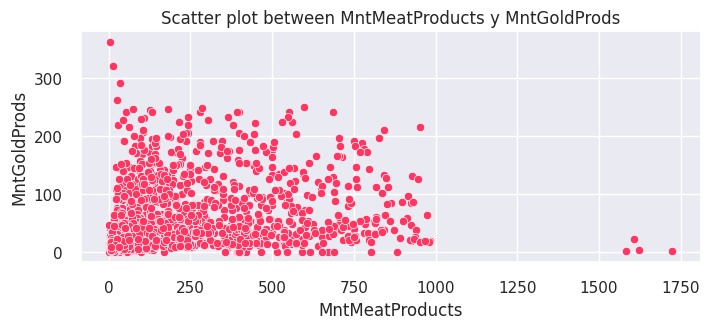

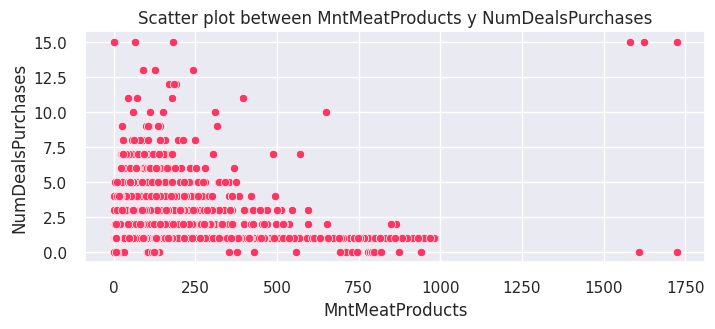

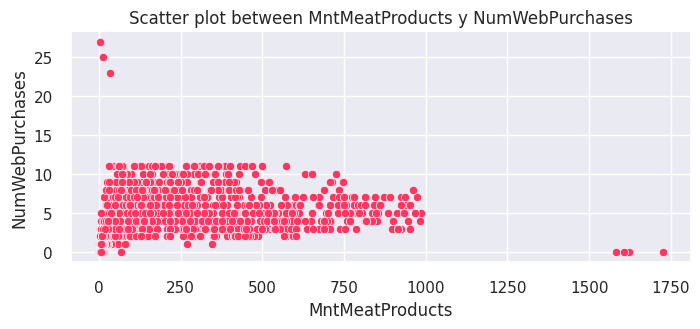

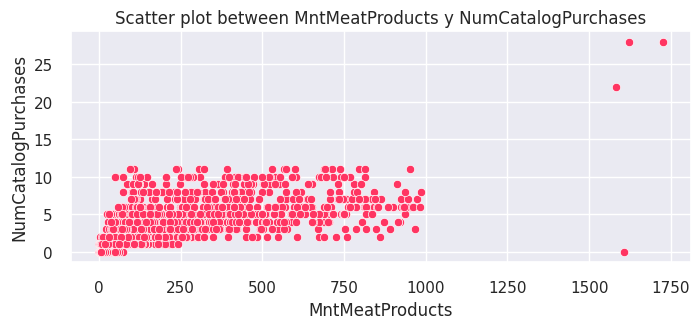

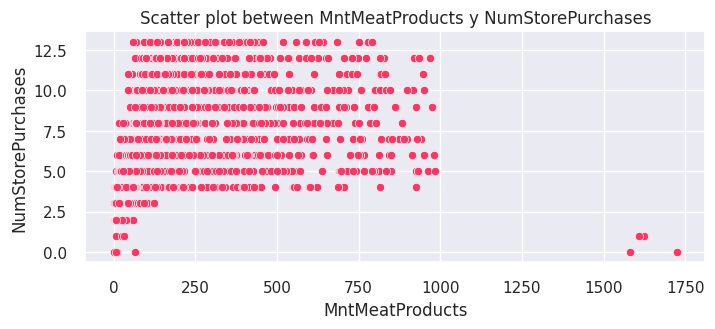

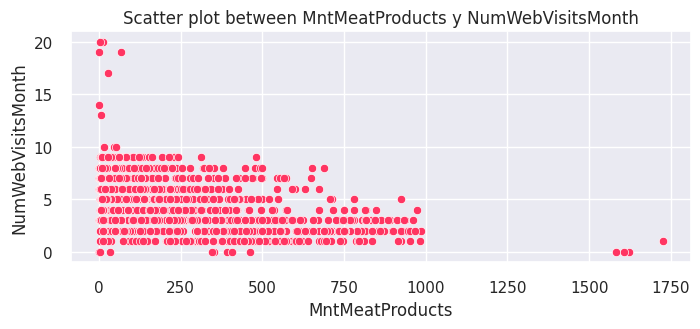

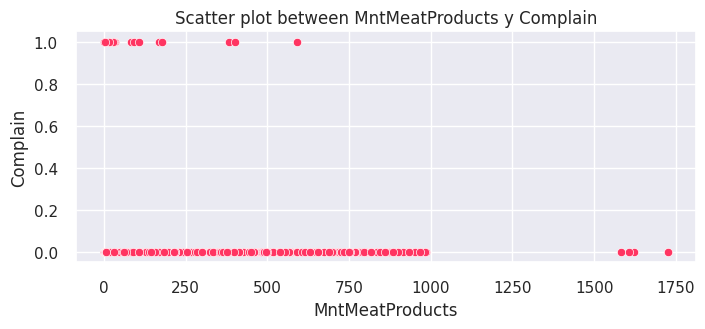

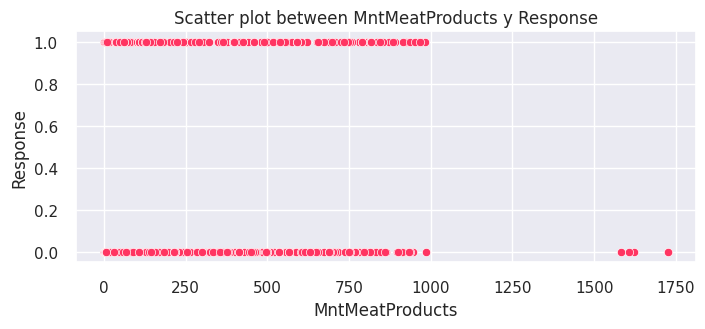

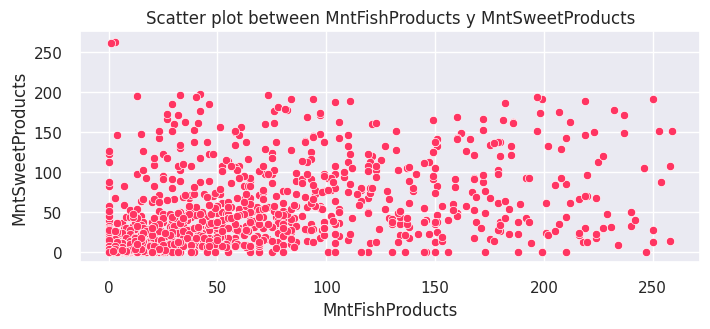

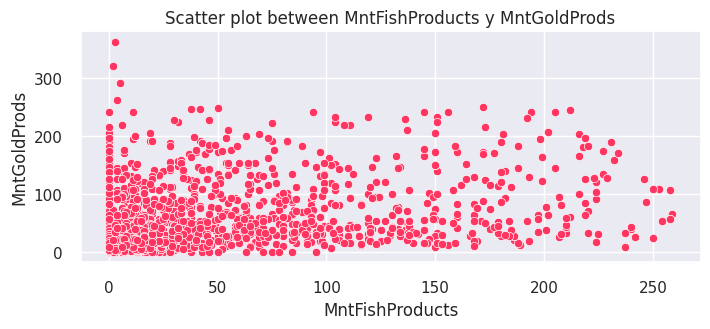

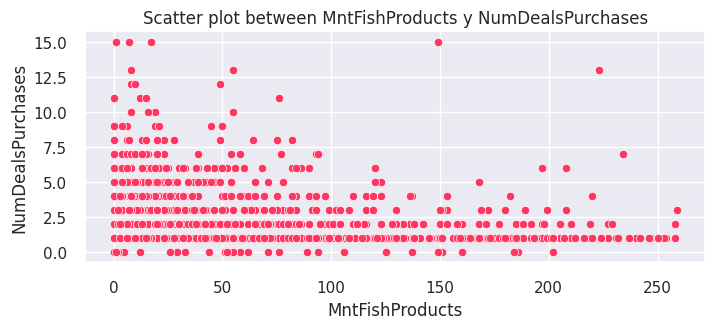

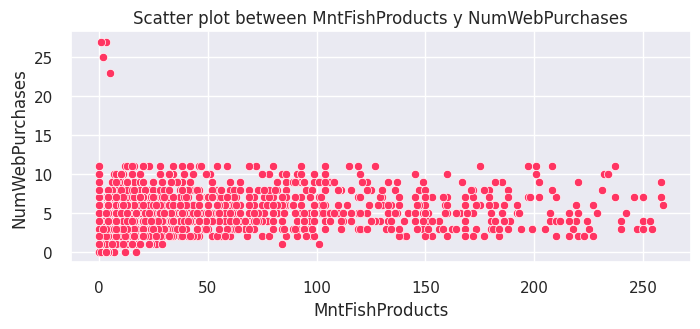

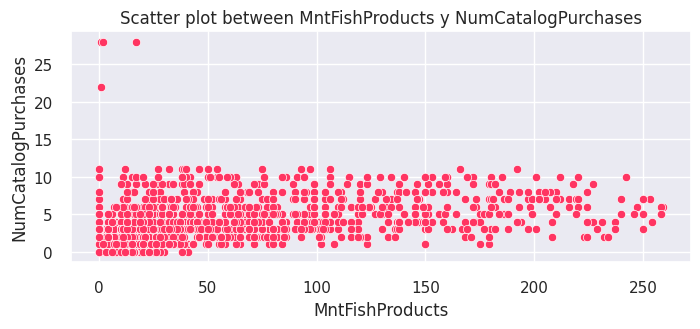

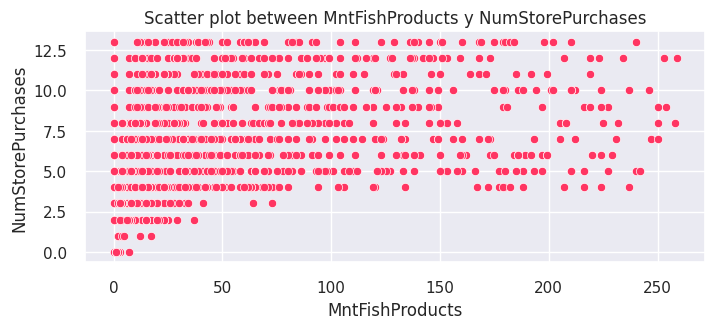

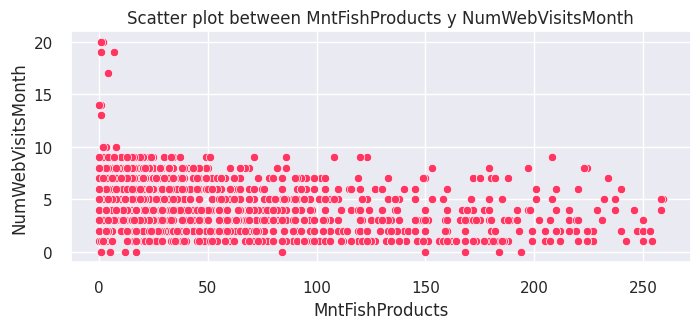

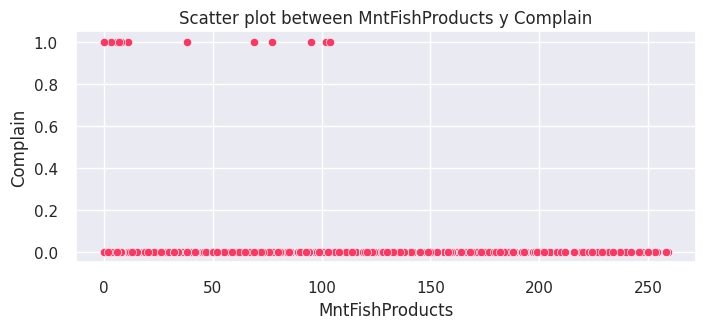

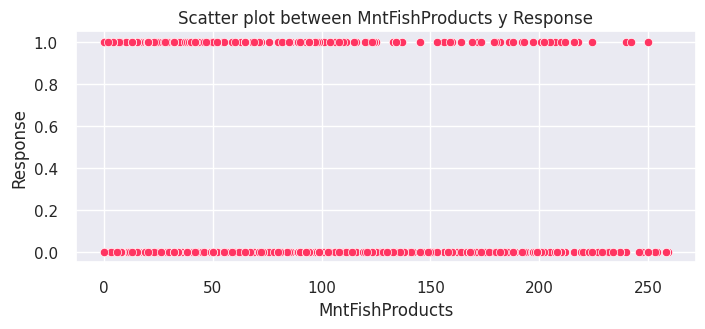

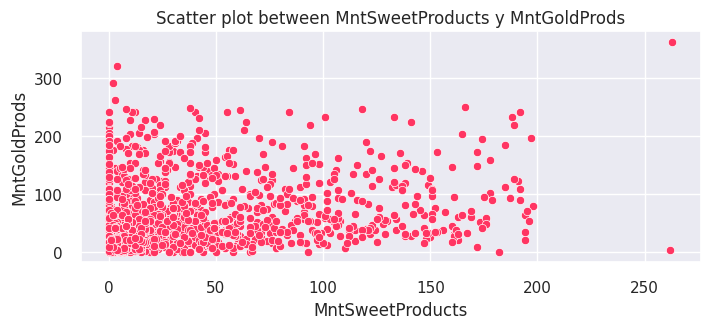

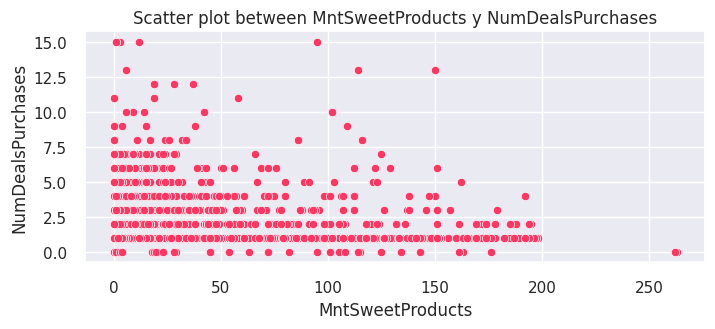

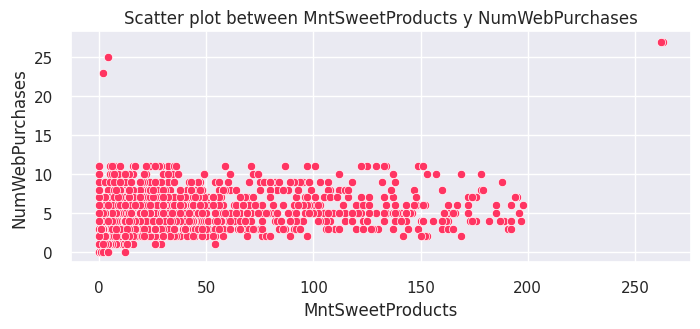

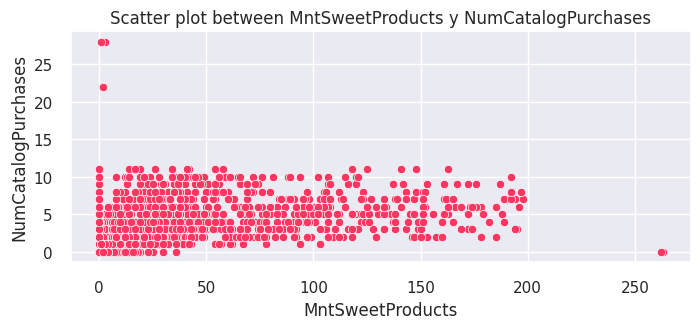

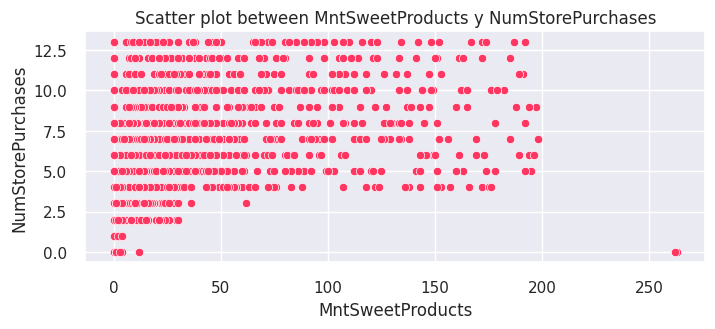

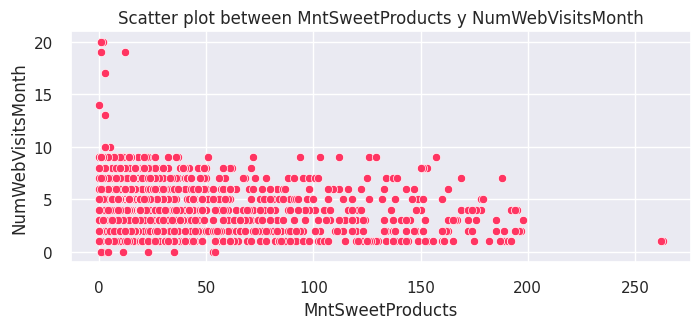

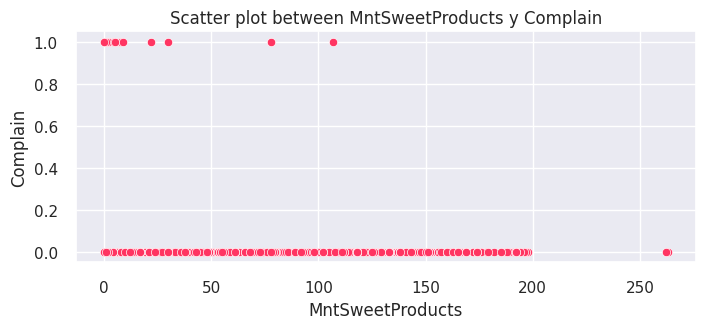

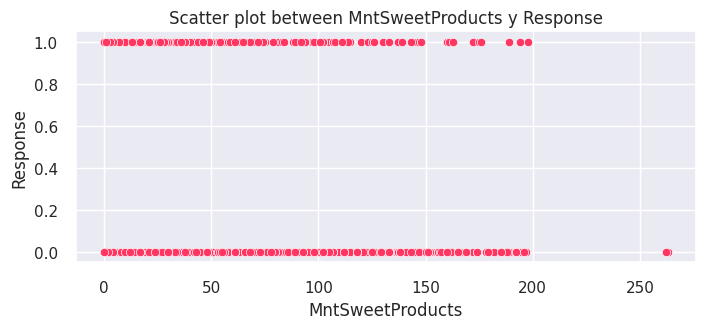

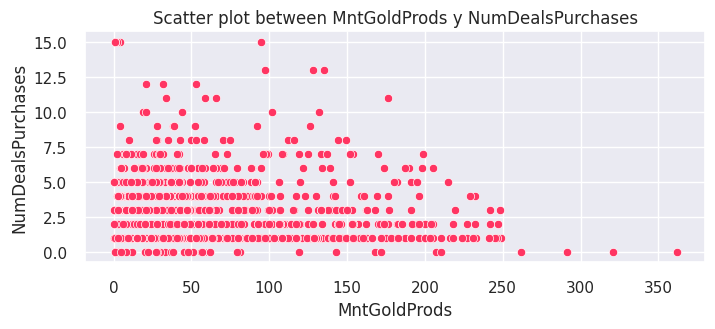

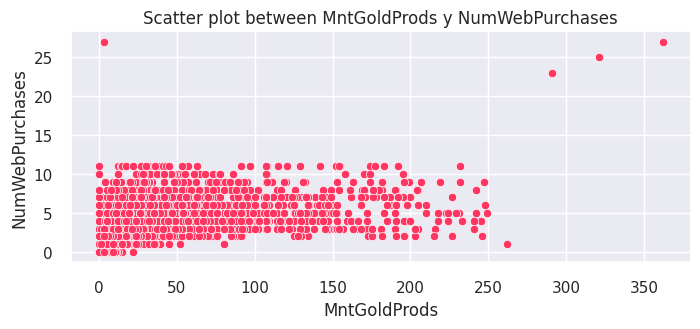

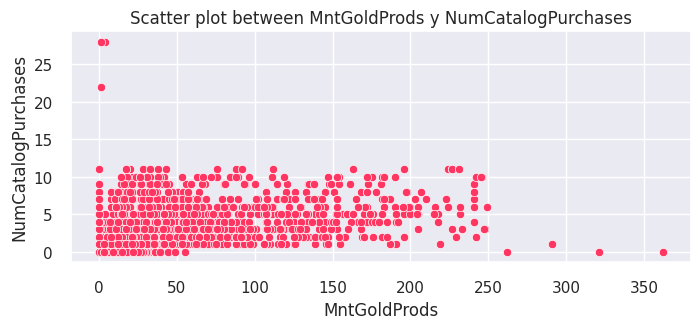

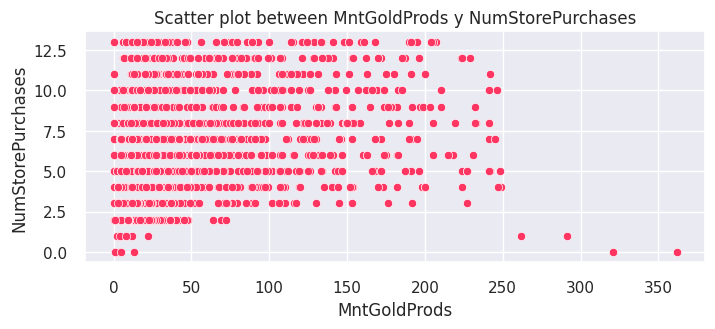

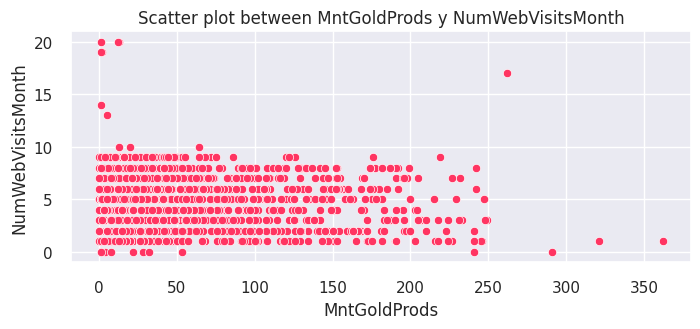

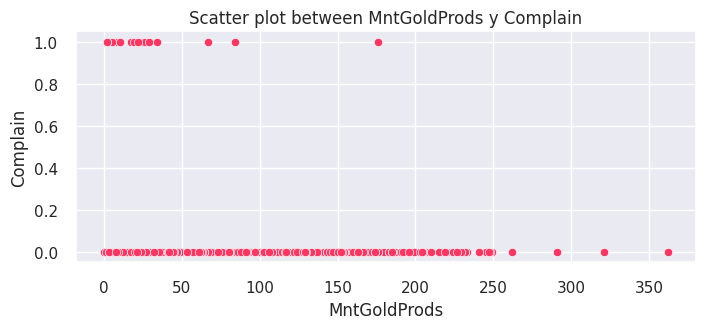

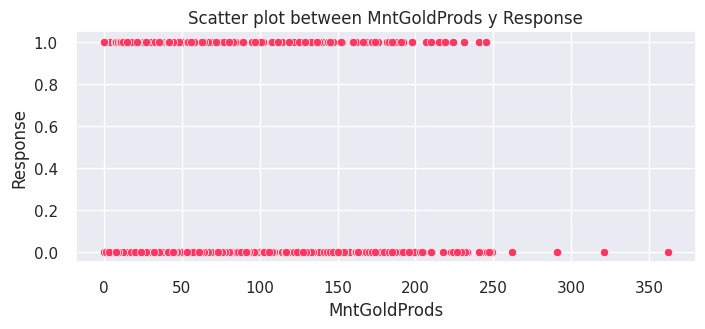

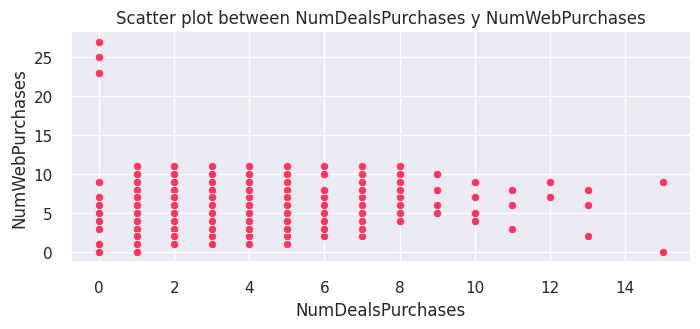

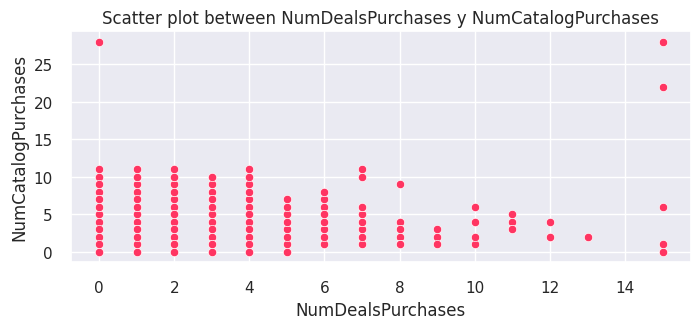

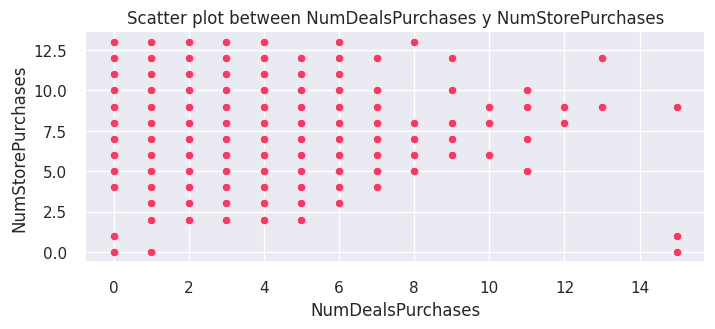

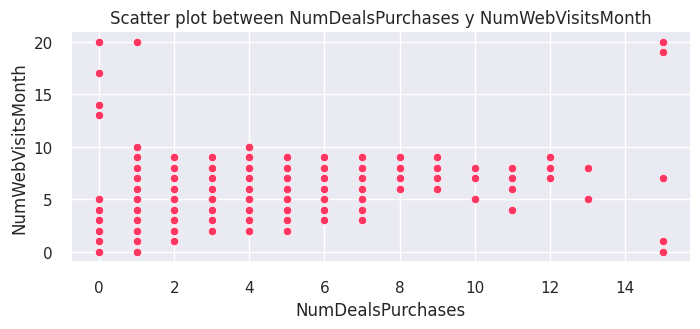

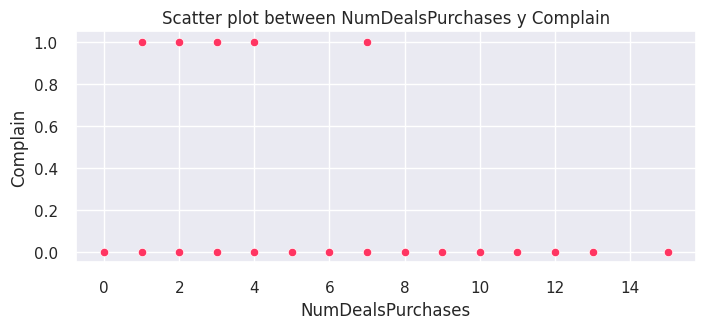

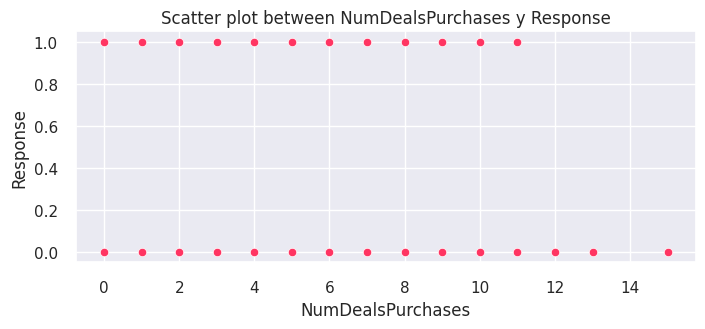

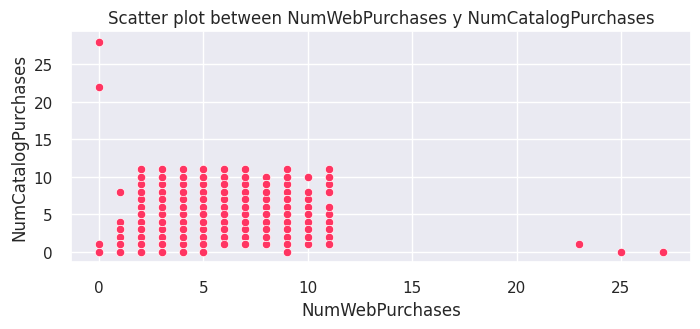

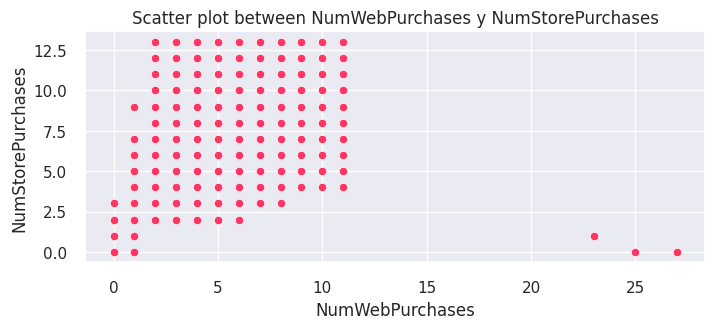

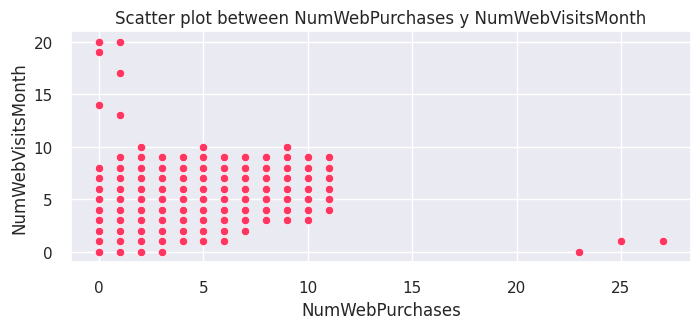

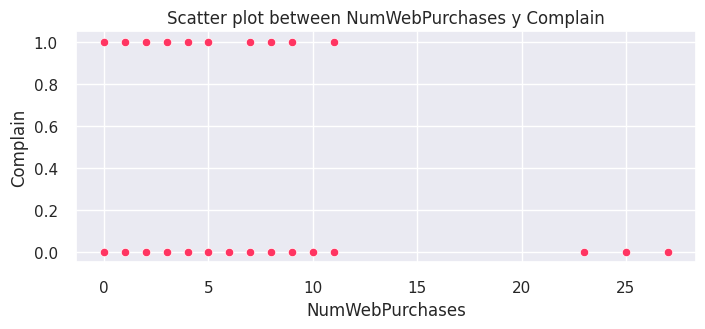

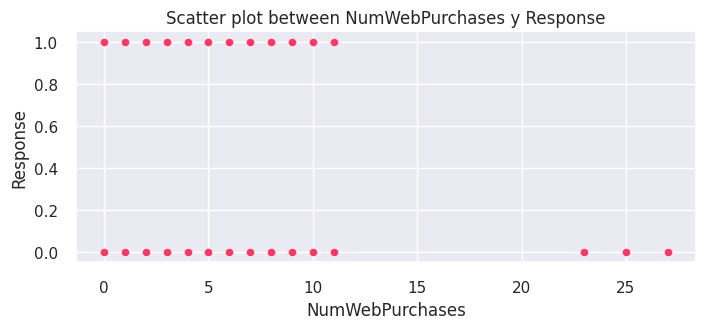

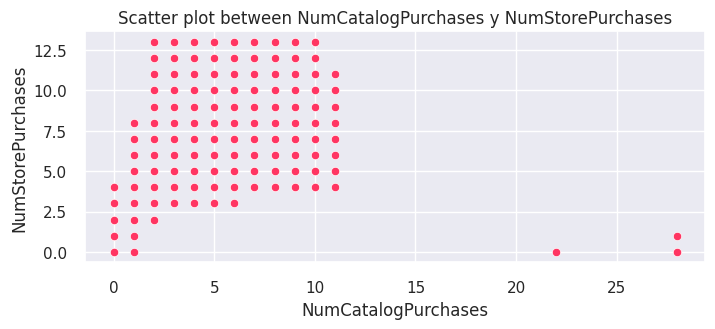

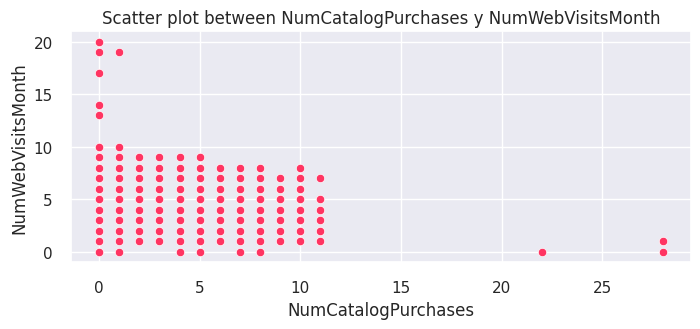

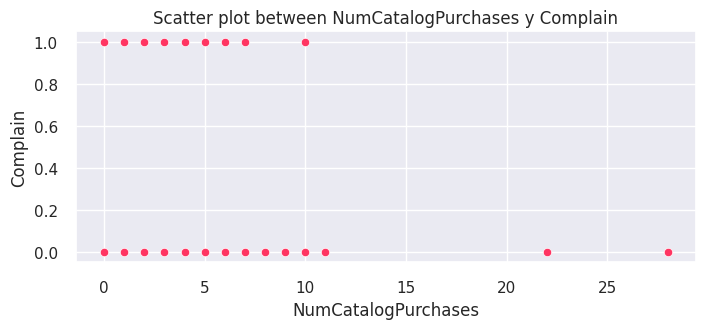

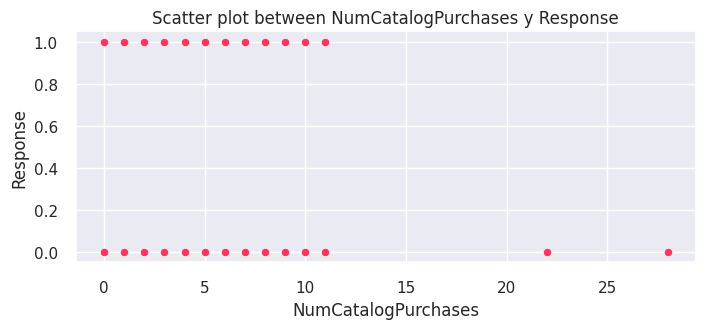

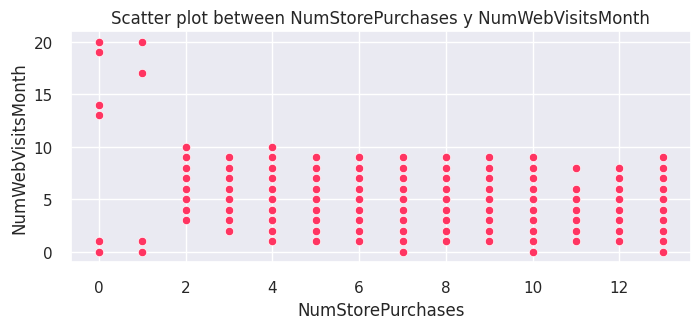

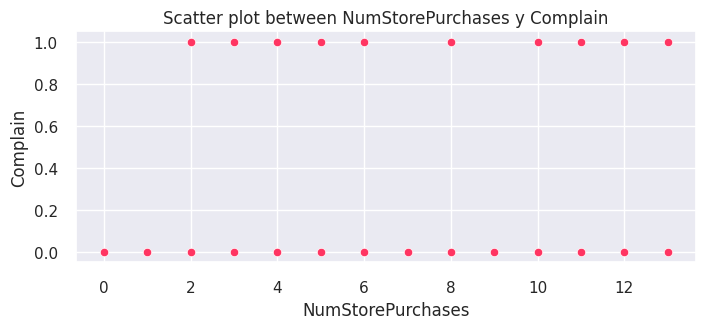

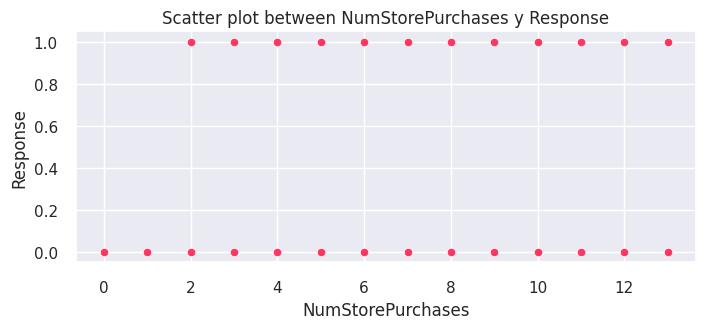

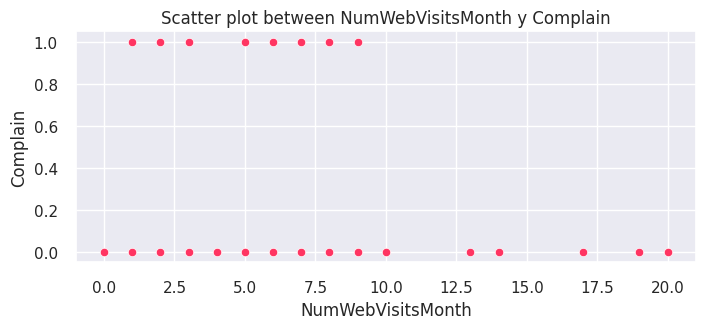

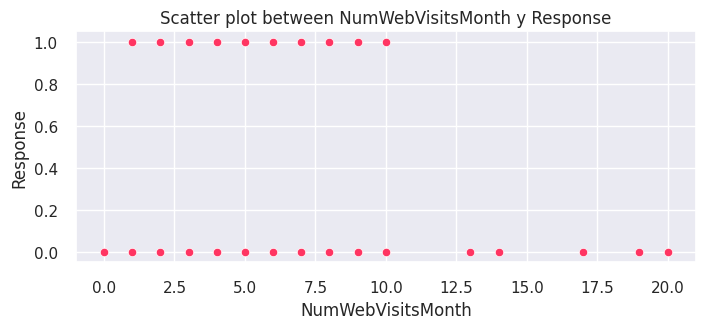

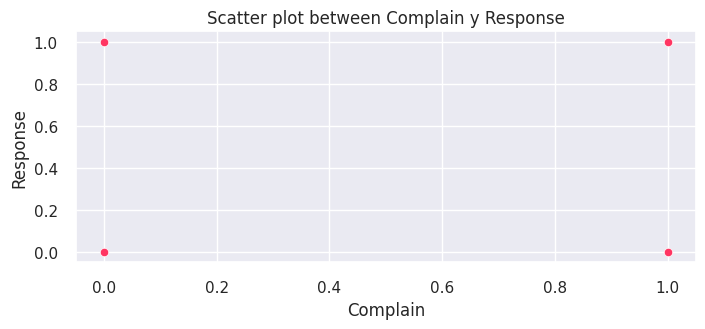

In [ ]:
## Bivariate numerical numerical


for i in range(len(data_num)):
    for j in range(i + 1, len(data_num)):
        plt.figure(figsize=(8, 3
                            ))
        sns.scatterplot(data=data, x=data_num[i], y=data_num[j], color = '#ff3562')
        plt.title(f"Scatter plot between {data_num[i]} y {data_num[j]}")
        plt.xlabel(data_num[i])
        plt.ylabel(data_num[j])
        plt.show()
'''
This code snippet generates scatter plots to visualize relationships between all
pairs of numerical features in the 'data' dataset. By iterating through each
feature and plotting it against the others, it helps identify potential correlations
and patterns. Each scatter plot is labeled with feature names and displayed
individually for a clearer exploratory analysis.

'''




### 📌 **Observations — Correlation Matrix**

📈 The **correlation matrix** reveals several interesting insights:

- 📦 There is a **strong positive correlation** between:
  - **Catalog purchases** and **fish product spending**: `0.72` 🐟  
  - **In-store purchases** and **wine/meat spending**: `0.64` 🍷🥩  
  👉 This indicates that:
    - Customers who shop via **catalog** tend to spend more on **fish**.
    - Customers who shop **in-store** tend to spend more on **wine and meat**.

- 💸 There's a **moderate negative correlation** between **income** and **website visits**: `-0.45`  
  → Higher-income customers tend to visit the website **less frequently**.

---

🧊 **Weakest Correlations**:
- 😠 **Customer complaints** (`Complain`) show **almost no correlation** with other behaviors.
- ⏳ **Recency** (how recent the last purchase was) has **minimal correlation** with the rest.
- 🏷️ **Discount-based purchases** (`NumDealsPurchases`) are **weakly related** to other variables.

🔎 These weak correlations suggest that **complaints**, **recency**, and **discount-based behaviors** may not be strong predictors of other purchasing patterns.


## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [ ]:
# Write your code here


# 1 . Scaling dat



scaling = data.copy()
# First, we have to encode data, and Dt customer we won't use for our clustering
# Let's check all variables are numerical, and which of them can we drop



# Scaling our data

scaler = StandardScaler() # Assign a name for our method o Standard Scaler
data_scaled = pd.DataFrame(scaler.fit_transform(scaling), columns = scaling.columns)
data_scaled.shape

(2240, 17)

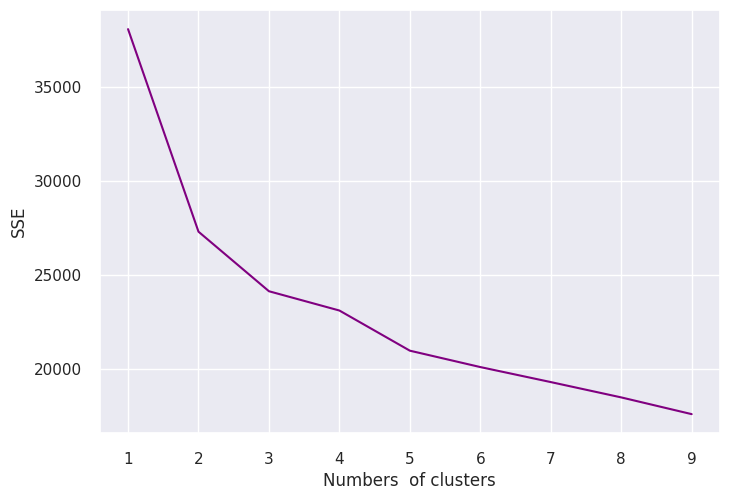

In [ ]:
sse = {}


for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)

    sse[k] = kmeans.inertia_
    # Let's save our info of inertia

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-', color = 'purple')
plt.xlabel("Numbers  of clusters")
plt.ylabel("SSE")
plt.show()

#Plot our line of elbow for search our perfect k



### 🔍 **K-Means Clustering — Elbow Method Observation**

📊 From the **Elbow Method** plot, we observe a **sharp drop at k = 2**, indicating a significant improvement in clustering performance when moving from 1 to 2 clusters.

✅ Based on this, we **hypothesize that the optimal number of clusters might be 2**.

➡️ Next, we will compute the **Silhouette Score** to **validate** this hypothesis and assess the **quality of the clustering**.


##### **Observations:**

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

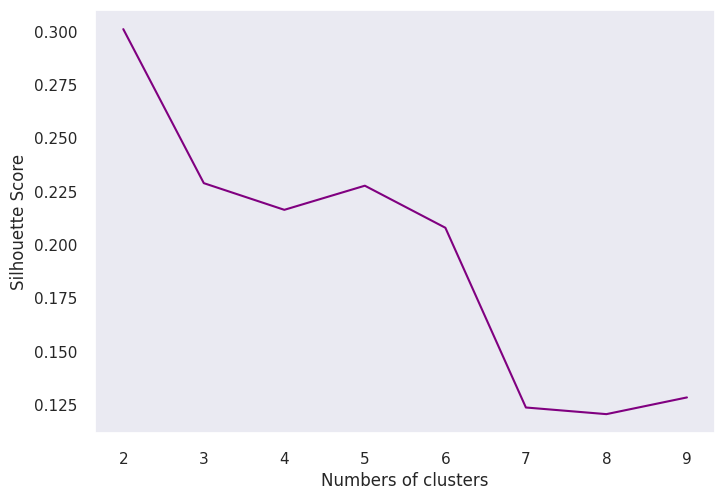

In [ ]:
# Write your code here

sc = {}

for s in range(2,10):
    kmeans = KMeans(n_clusters = s, random_state = 1).fit(data_scaled)
    label = kmeans.predict(data_scaled)
    sc[s] = silhouette_score(data_scaled, label)

plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-', color = 'purple')
plt.xlabel("Numbers of clusters")
plt.ylabel("Silhouette Score")

plt.show()

##### **Observations:**

The graph suggests that 2 clusters are optimal based on the Silhouette Score

  - Our silhouette score is bigger in k=2



#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
# Write your code here

start_time = time.time()

kmeans = KMeans(n_clusters= 2, random_state = 1)
kmeans.fit(data_scaled)

end_time = time.time()

total_time = end_time - start_time

print("The total time that takes for fit the data is ", total_time)

The total time that takes for fit the data is  0.012793779373168945


##### **Observations:**

The code runs K-Means on scaled data with 2 clusters, following the Silhouette Score analysis. The model fitting took 0.01279 seconds, indicating efficient execution.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

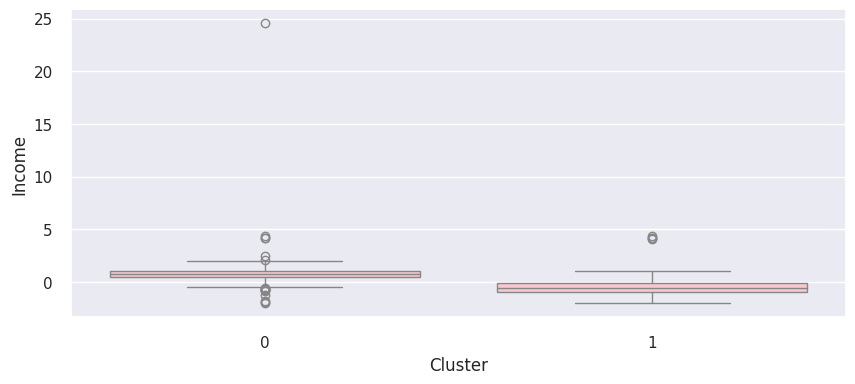

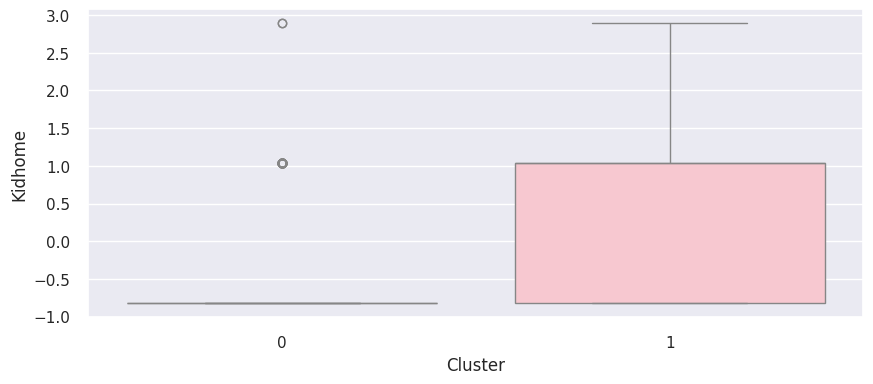

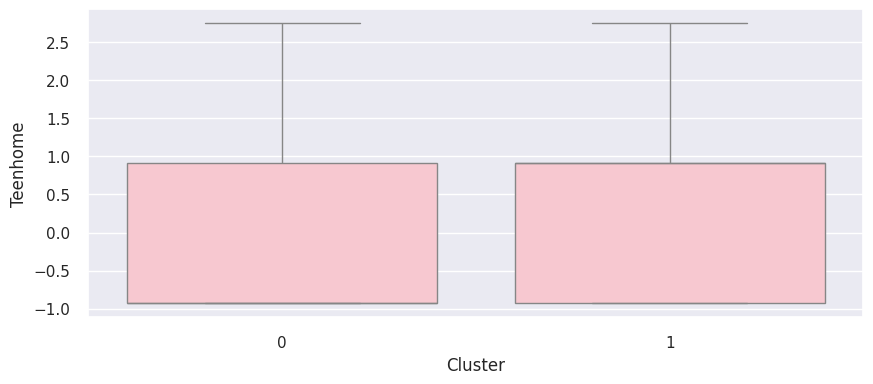

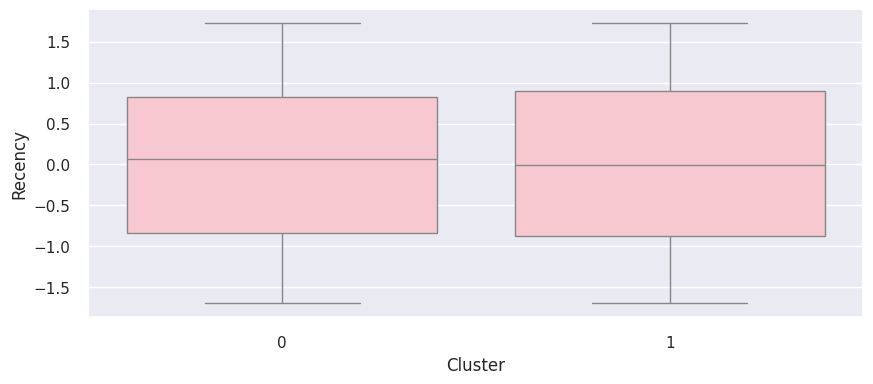

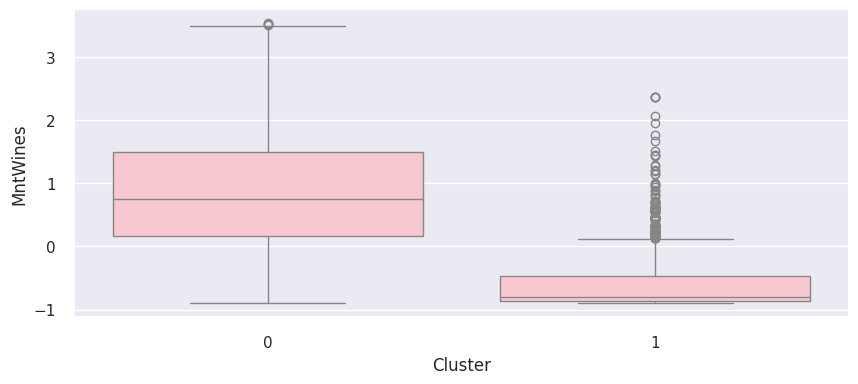

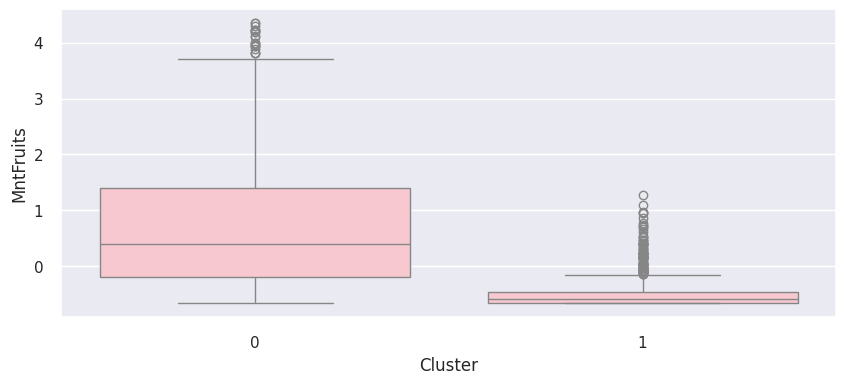

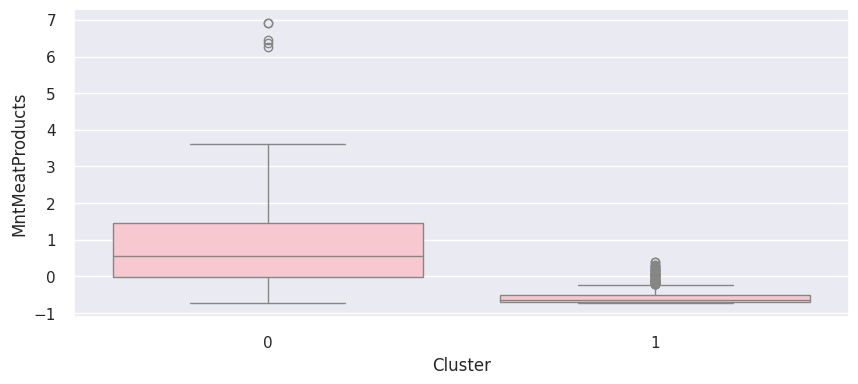

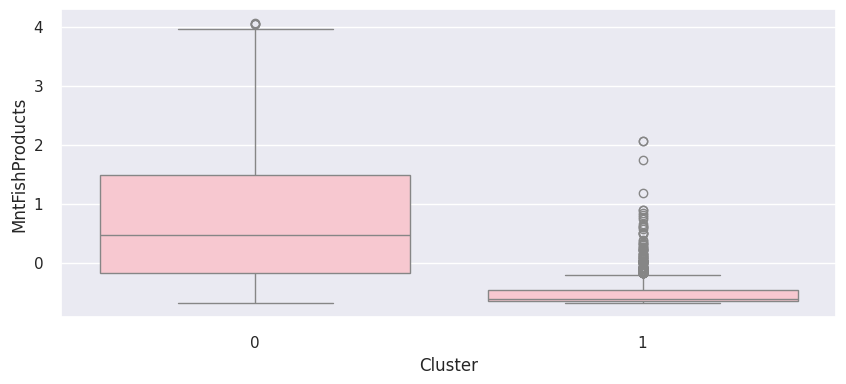

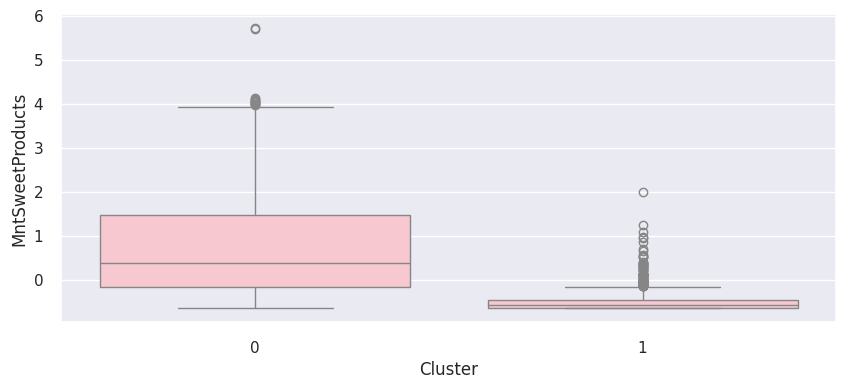

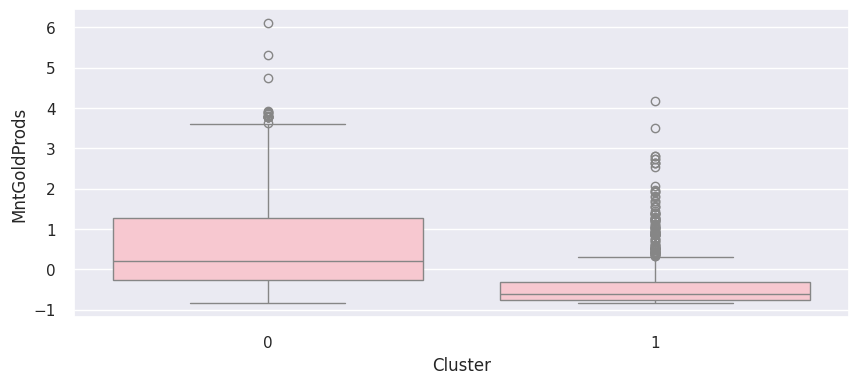

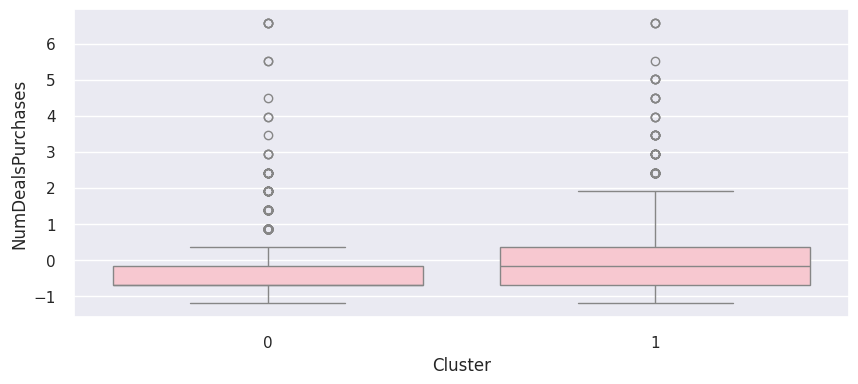

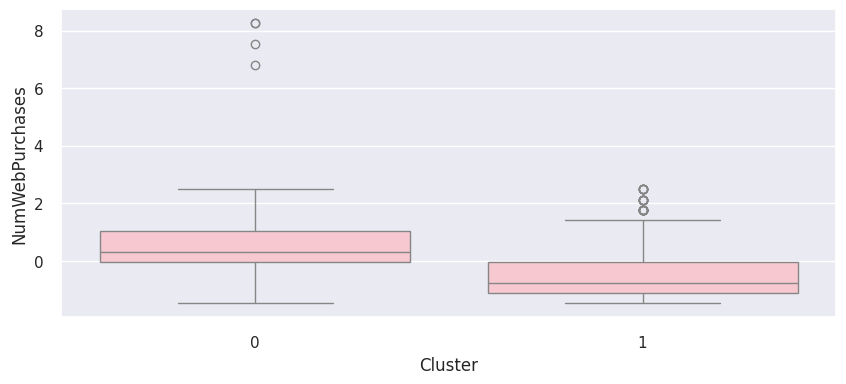

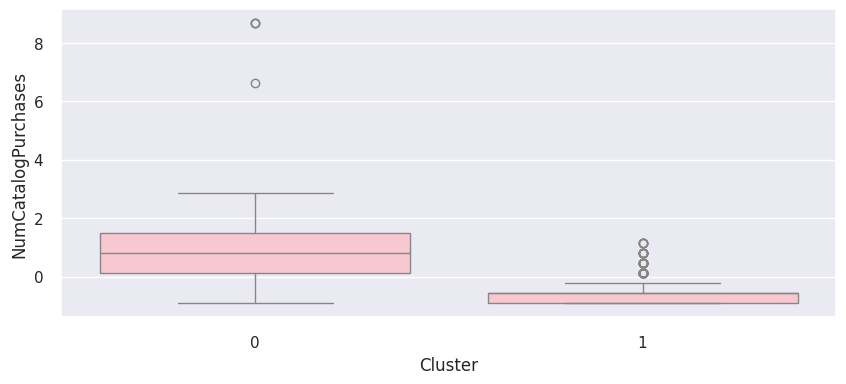

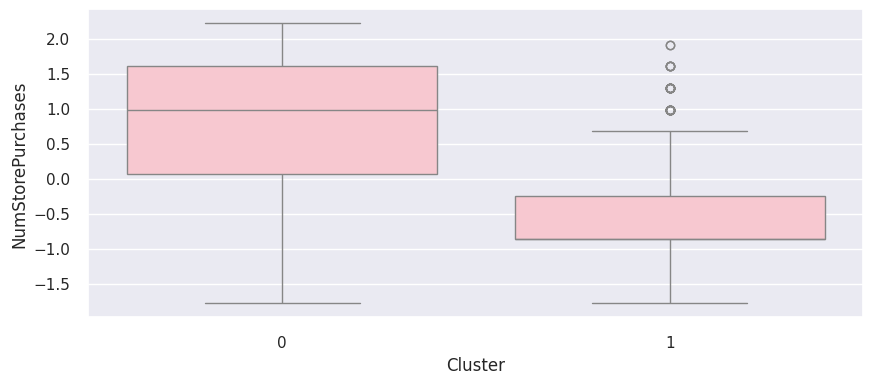

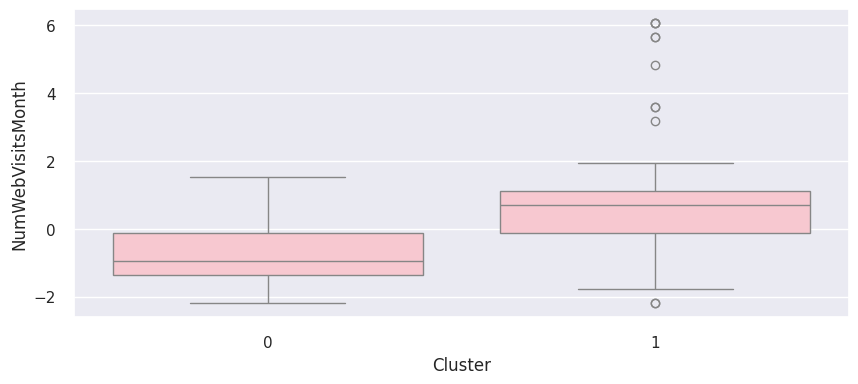

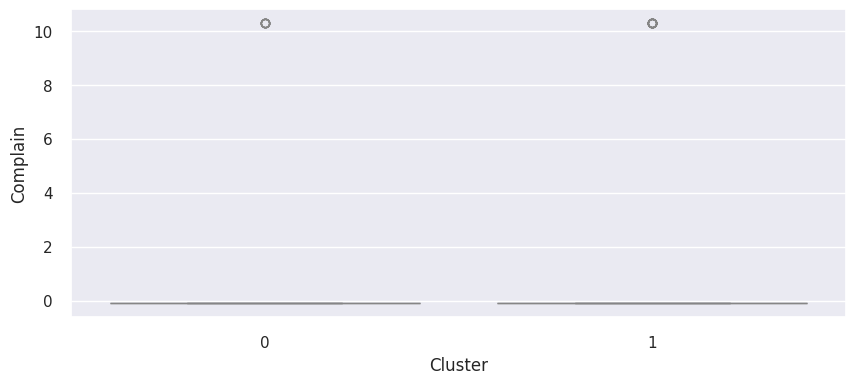

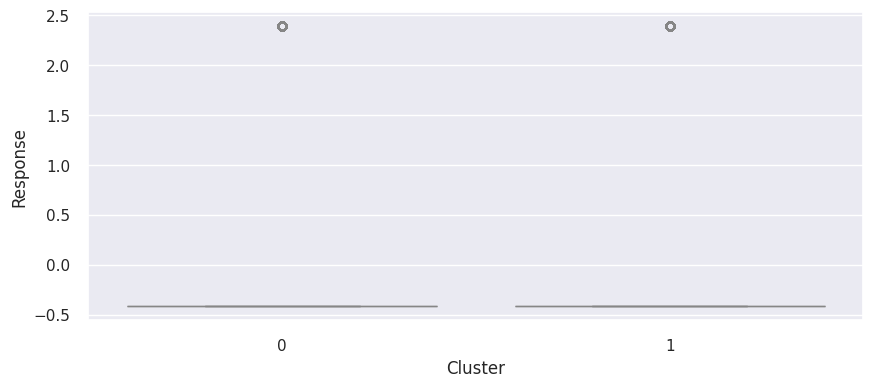

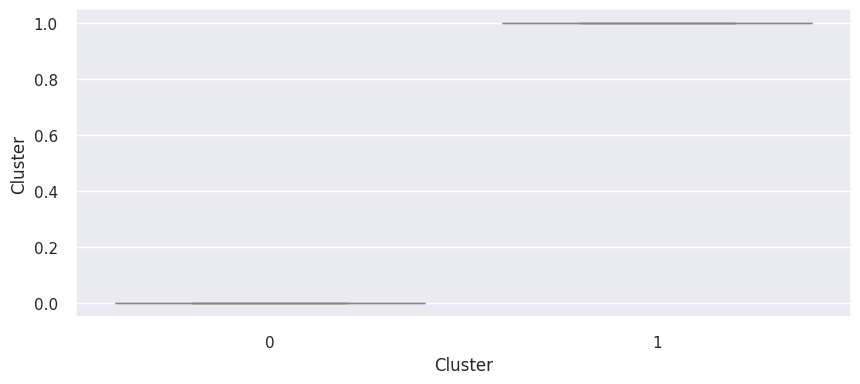

In [ ]:
data_scaled['Cluster'] = kmeans.labels_

sns.set(style = 'darkgrid')
for i in data_scaled[:-1]:
  plt.figure(figsize = (10,4))
  sns.boxplot(data = data_scaled, x = 'Cluster', y= i, color = 'pink')
  plt.show()
# Write your code here

### 🔍 **Clustering Observations — Customer Segments (K=2)**

After applying clustering, we identified **two distinct customer groups**:

#### 🧩 **Cluster 0**
- 💰 **Low-income** customers.
- 👨‍👩‍👧‍👦 **Few or no children/teenagers** at home.
- 🍷 Spend **more on wine**, 🥩 **meat**, and 🍬 **sweets**.
- 🛍️ Prefer **in-store shopping**.
- 🔻 Make **fewer discount-based purchases**.
- 🌐 **Less frequent website visits**.

#### 🧩 **Cluster 1**
- 💰 Also **low-income** customers.
- 👶 Greater **variability in number of children**.
- 🍷 Spend **less on wine**, 🥩 **meat**, and 🍬 **sweets**.
- 🧾 Make **more discount-based purchases**.
- 🛒 Shop **less in-store**.
- 🌐 **Slightly more active** on the website.

📌 These insights can help tailor **marketing strategies**, such as offering personalized discounts to Cluster 1 and premium loyalty rewards to Cluster 0.


#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual


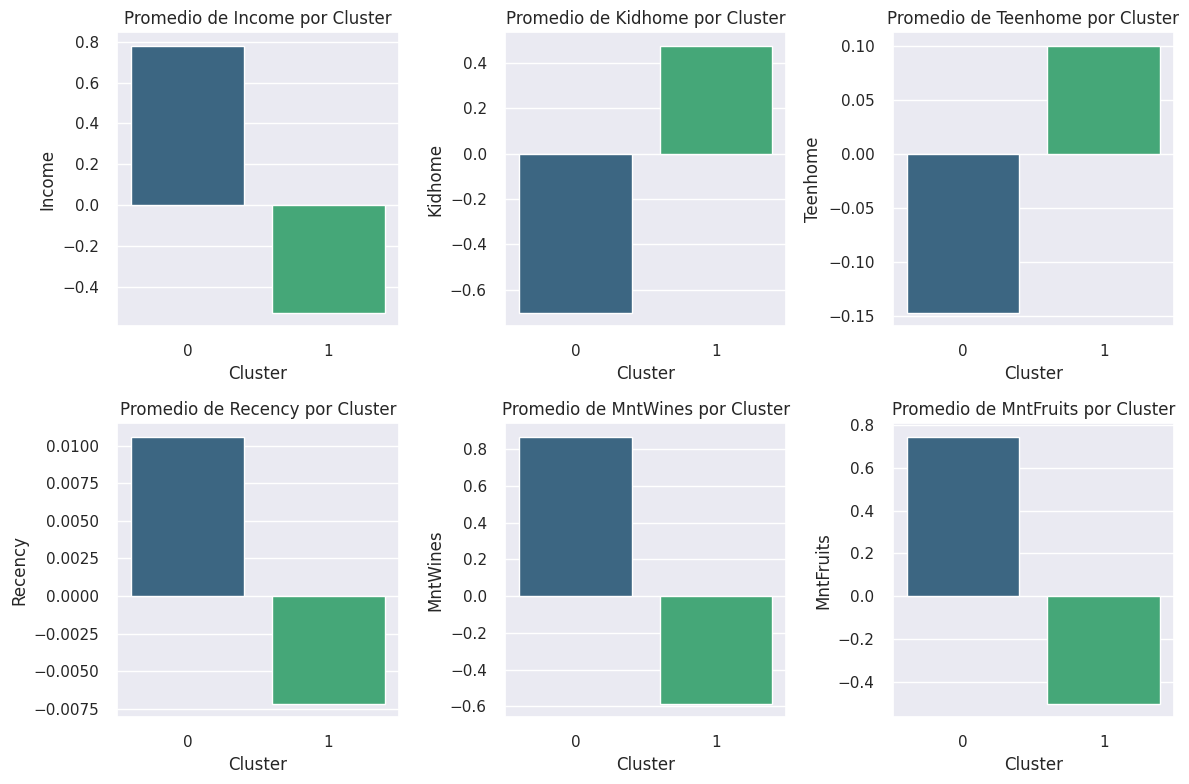

Income                -0.527882
Kidhome                0.474948
Teenhome               0.099884
Recency               -0.007164
MntWines              -0.587989
MntFruits             -0.504575
MntMeatProducts       -0.576414
MntFishProducts       -0.519707
MntSweetProducts      -0.504913
MntGoldProds          -0.414727
NumDealsPurchases      0.122361
NumWebPurchases       -0.415009
NumCatalogPurchases   -0.610467
NumStorePurchases     -0.568057
NumWebVisitsMonth      0.459120
Complain               0.011456
Response              -0.147533
Cluster                1.000000
dtype: float64




"This code visualizes cluster characteristics using bar plots and prints numerical summaries. \n1. It first assigns cluster labels to the data and creates bar plots showing the average values of the first six numerical \nfeatures for each cluster. \nThese plots help to visually understand how the clusters differ in terms of these features. \nAfterward, it calculates and prints the mean values of all scaled features specifically for cluster 1,\nproviding a more detailed numerical representation of this cluster's characteristics. \nThis combined approach of visualization and numerical summaries helps in gaining insights into the distinct \nproperties of each cluster."

In [ ]:
data_scaled['Cluster'] = kmeans.labels_
data['Cluster'] = data_scaled['Cluster']

k_Value = 2

plt.figure(figsize=(12, 8))
for i, col in enumerate(data_num[:6]):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Cluster', y=col, data=data_scaled, palette='viridis', ci=None)
    plt.title(f'Promedio de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

for cluster in range(1, 2):
    cluster_data = data_scaled[data_scaled['Cluster'] == cluster].mean()
    print(cluster_data)
    print('\n')

'''This code visualizes cluster characteristics using bar plots and prints numerical summaries.
1. It first assigns cluster labels to the data and creates bar plots showing the average values of the first six numerical
features for each cluster.
These plots help to visually understand how the clusters differ in terms of these features.
Afterward, it calculates and prints the mean values of all scaled features specifically for cluster 1,
providing a more detailed numerical representation of this cluster's characteristics.
This combined approach of visualization and numerical summaries helps in gaining insights into the distinct
properties of each cluster.'''

---

### 🔍 **Observations: Customer Segmentation Insights**

The analysis identifies **two key customer segments**:

#### 🥂 Cluster 0 – High-Value Customers
- 💰 Higher incomes  
- 🛍️ Spend more on **premium products** like **wine** and **fruits**  
- 🧑‍💼 Likely value exclusivity and quality over quantity  

#### 👨‍👩‍👧 Cluster 1 – Family-Oriented Customers
- 👛 Lower incomes  
- 👶 More children at home  
- 🛒 Focused on **essential goods** and **value-driven purchases**  

---

### 🎯 Strategic Applications

This segmentation allows the company to take **targeted actions**, such as:
- 💎 **Premium offers** and loyalty perks for **Cluster 0**
- 👨‍👩‍👧‍👦 **Family-oriented deals** and bundled discounts for **Cluster 1**

➡️ By aligning marketing strategies with customer needs, the company can **boost engagement, satisfaction, and long-term profitability**.

---


## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

### 🧠 Strategic Business Recommendations Based on Customer Segments

To boost profitability and long-term customer engagement, the company should **leverage customer segmentation** to personalize marketing, tailor products and services, enhance user experience, and optimize resource allocation.

---

#### 🥇 **Cluster 0 – High Spenders**

These customers show a strong preference for wine, meat, sweets, and in-store shopping. They tend to spend more and value premium experiences.

**📈 Strategic Recommendations:**
- 🎯 **Marketing**: Target them with **exclusive offers**, luxury promotions, and **personalized communication** (e.g., tailored emails, VIP calls).
- 🛍️ **Products**: Introduce **gourmet items**, **VIP memberships**, and premium bundles.
- 💎 **Customer Experience**: Offer white-glove service, loyalty programs, and personalized support to maintain engagement.
- 💸 **Resource Focus**: Allocate more resources here to **retain and grow** this high-value segment.

---

#### 👨‍👩‍👧‍👦 **Cluster 1 – Budget-Conscious Families**

These customers have more children, spend less, and are more responsive to discounts and online activity.

**📈 Strategic Recommendations:**
- 🎯 **Marketing**: Use messaging that emphasizes **value**, **savings**, and **family-friendly promotions**.
- 🛍️ **Products**: Offer **bundled deals**, essential goods, and home delivery services.
- 🏡 **Services**: Consider launching **family event packages**, loyalty perks for budget-conscious shoppers, or installment plans.
- 🧠 **Customer Experience**: Train staff to support value-focused interactions, and ensure online channels are optimized for quick, affordable shopping.

---

### 🔄 Monitoring & Optimization

- 📊 Continuously track customer behavior to detect shifts in preferences.
- 🔁 Adjust segmentation strategies based on data and KPIs.
- ⚙️ Use adaptive inventory and pricing strategies to **maximize impact per segment**.

➡️ **The goal**: keep Cluster 0 loyal and profitable, while **nudging Cluster 1 toward higher engagement and spend** — ensuring both short-term wins and long-term growth.

---
